# Qualitative analysis of the nationalities

In this notebook, we will analyze  the nationalities of the individuals. In Wikidata, the nationalities (P27) are written as "country of citizenship". They are countries and they are many. Here, to facilitate the analysis, we will code the countries into continents.

Also, a person can have more than one nationality. It does not matter, we keep it like this (we remove the individuals with 2 times the same continent coded).

Then, we will compare the nationalities between "economist" and "jurist". We will execute the same process with the gender.

In [1]:
from SPARQLWrapper import SPARQLWrapper, SPARQLWrapper2, JSON, TURTLE, XML, RDFXML

from collections import Counter
from operator import itemgetter

import sqlite3 as sql
import time

from importlib import reload
from shutil import copyfile

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#import seaborn as sns

import pprint
import csv
import ast
import re

In [2]:
### install ipywidgets  cf . https://ipywidgets.readthedocs.io/en/latest/user_install.html
from ipywidgets import (
    interact, IntSlider, Checkbox,
    interactive, SelectMultiple, Button)
"""    fixed,
    interactive, Button,
    HTML, Layout,GridspecLayout,
    Output, jslink,
     ColorPicker,
    Text, SelectionRangeSlider,
    FloatRangeSlider, SelectMultiple, Checkbox,
    VBox, HBox
"""

ModuleNotFoundError: No module named 'ipywidgets'

In [3]:
import sparql_functions as spqf

In [6]:
### It's define the database ligne to use
pk_query = 106

# Connexion to the database
original_db = 'data/sparql_queries.db'
conn = sql.connect(original_db)

c = conn.cursor()

### It runs the query on the SQLite database to get the row values 
c.execute('SELECT * FROM query WHERE pk_query = ?', [pk_query]) ### a list around argument is needed for a string longer then one
#c.execute('SELECT * FROM query WHERE pk_query = 10')

rc = c.fetchone()

# close connexion
conn.close()


In [7]:
print(rc[2] +  "\n-----\n" + rc[4] +  "\n-----\n" +   rc[7]+  "\n\n\n------------------\n" +  rc[5] + "\n\n\n------------------\n")

                                          /
-----
http://localhost:7200/repositories/IMPORT
-----
2021-06-22 14:30:36


------------------
PREFIX  egr:  <http://rdvocab.info/ElementsGr2/>
PREFIX  owl:  <http://www.w3.org/2002/07/owl#>
PREFIX  rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX  ome:  <https://ontome.net/class/>
PREFIX  wdt:  <http://www.wikidata.org/prop/direct/>
PREFIX  xsd:  <http://www.w3.org/2001/XMLSchema#>
PREFIX  bio:  <http://vocab.org/bio/0.1/>
PREFIX  rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX  wd:   <http://www.wikidata.org/entity/>

SELECT  ?occupation_concat ?count_occupation
WHERE
  { { SELECT  ?occupation_concat (COUNT(?occupation_concat) AS ?count_occupation)
      WHERE
        { SELECT  ?person (GROUP_CONCAT(DISTINCT ?occupation ; separator='|') AS ?occupation_concat)
          WHERE
            { SELECT DISTINCT  ?person ?occupation
              WHERE
                { { SELECT DISTINCT  ?person ?occupation1
                    WHER

In [8]:
### Execute the SPARQL query wrapped in the function in the library _sparql_functions.py_
# The first setting correspond to SPARQL Endpoint, the seconde to the query
q = spqf.get_json_sparql_result(rc[4],rc[5])

<class 'dict'>


In [9]:
##### Transform the result into a list with a fonction of the library #####
#### Result of the query
r_query = [l for l in spqf.sparql_result_to_list(q)]
print(len(r_query))
#r_query

6689


In [10]:
# Save the list in the CSV format 
# It is necessary after saving to code all nationalities into continent 
file= 'spreadsheets/nationalities.csv'
with open(file, 'w', newline='') as csvfile:
    writ = csv.writer(csvfile, delimiter='|',
                            quotechar='"', quoting=csv.QUOTE_MINIMAL)
    writ.writerow(['nationality', 'freq', 'code'])
    for l in r_query:
        writ.writerow(l)

In [42]:
# It opens the file with the continent
file= 'spreadsheets/nationalities_coded.csv'
file_cont = []
with open(file, newline='') as csvfile:
    read = csv.reader(csvfile, delimiter='|', quotechar='"')
    for row in read:
        file_cont.append(row)

In [43]:
print(len(file_cont))
file_cont[1:10]

502


[['United States of America', '25500', 'Unite', 'North Am.'],
 ['Germany', '12223', 'Germa', 'Europe'],
 ['Spain', '5396', 'Spain', 'Europe'],
 ['France', '3933', 'Franc', 'Europe'],
 ['United Kingdom', '3853', 'Unite', 'Europe'],
 ['Japan', '3845', 'Japan', 'Asia'],
 ['Poland', '3016', 'Polan', 'Europe'],
 ['Brazil', '2721', 'Brazi', 'South Am.'],
 ['Canada', '2598', 'Canad', 'North Am.']]

In [44]:
# Keep only the nationality and its continent
df_coded_nation = pd.DataFrame(file_cont[1:], columns=['nationality','freq','code', 'continent'])
nat_coded = df_coded_nation[['nationality','continent']]
print(len(nat_coded))
nat_coded.head()

501


,nationality,continent
0,United States of America,North Am.
1,Germany,Europe
2,Spain,Europe
3,France,Europe
4,United Kingdom,Europe


In [148]:
## It's define the database ligne to use
pk_query = 102

# Connexion to the database
original_db = 'data/sparql_queries.db'
conn = sql.connect(original_db)

c = conn.cursor()

### It runs the query on the SQLite database to get the row values 
c.execute('SELECT * FROM query WHERE pk_query = ?', [pk_query]) ### a list around argument is needed for a string longer then one
#c.execute('SELECT * FROM query WHERE pk_query = 10')

rc = c.fetchone()

# close connexion
conn.close()


In [70]:
print(rc[2] +  "\n-----\n" + rc[4] +  "\n-----\n" +   rc[7]+  "\n\n\n------------------\n" +  rc[5] + "\n\n\n------------------\n")

We seek to obtain the year of the individuals to analyze the nationalities in the time.
-----
http://localhost:7200/repositories/IMPORT
-----
2021-06-16 17:58:19


------------------
PREFIX ome: <https://ontome.net/class/>
PREFIX  bio: <http://vocab.org/bio/0.1/>
PREFIX  egr:  <http://rdvocab.info/ElementsGr2/>

PREFIX  wd:   <http://www.wikidata.org/entity/>
PREFIX  wdt:  <http://www.wikidata.org/prop/direct/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>

PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
SELECT  ?person   ?year ?nationality
WHERE{
SELECT  ?person ?nationality (ROUND(AVG(?birthDate_avg)) AS ?year)
WHERE {
    SELECT Distinct ?person ?nationality (YEAR(?bD) AS ?birthDate_avg)
   WHERE
      {?person wdt:P569 ?bD .
       ?person wdt:P27 ?na .
       ?na rdfs:label ?nationality
      }
}
   GROUP BY ?person ?nationality
}



------------------



In [71]:
### Execute the SPARQL query wrapped in the function in the library _sparql_functions.py_
# The first setting correspond to SPARQL Endpoint, the seconde to the query
q = spqf.get_json_sparql_result(rc[4],rc[5])

<class 'dict'>


In [72]:
##### Transform the result into a list with a fonction of the library #####
#### Result of the query
r_query = [l for l in spqf.sparql_result_to_list(q)]
print(len(r_query))
#r_query

118874


In [73]:
# Create a dataFrame
df_result_year = pd.DataFrame(r_query)
df_result_year.columns =['uri_entity', 'year', 'nationality']


In [74]:
df_result_year.head()

,uri_entity,year,nationality
0,urn:uuid:fb3527da-478c-4e4f-a861-9de00b9d154b,1959,Canada
1,urn:uuid:5c7f3133-a15b-4f35-8e17-162cf63207f7,1809,United States of America
2,urn:uuid:92ebbd17-f4d1-4cdd-816c-5fcf4ba34dce,1912,Germany
3,urn:uuid:9ce56c33-08da-497c-afb0-38cb6ff6536c,1884,United States of America
4,urn:uuid:2178758f-d8df-447d-b64b-bd78dfe045b7,1940,Ukraine


In [75]:
# Add the continent of the individuals
merged = pd.merge(df_result_year,nat_coded, on='nationality', sort=False)
print(len(merged))
merged.sort_values(by=['uri_entity']).loc[30:50,]

118874


,uri_entity,year,nationality,continent
30,urn:uuid:63cef059-c16a-475c-b4a3-f2b013d705ee,1840,Canada,North Am.
75944,urn:uuid:63cf0cd9-b90b-423d-8d51-b0792bcba109,1954,Mexico,North Am.
11123,urn:uuid:63cf62b9-6d0a-4a63-ba09-da3055ea98a0,1872,United States of America,North Am.
80049,urn:uuid:63d00487-57f8-4fcd-a65d-a59145e0d193,1943,Italy,Europe
82561,urn:uuid:63d00487-57f8-4fcd-a65d-a59145e0d193,1943,Kingdom of Italy,Europe
...,...,...,...,...
13473,urn:uuid:6ab857e2-2483-4f69-8530-e9bc9f1f71f9,1783,United States of America,North Am.
33884,urn:uuid:6ab96a5f-a592-4ac8-8eeb-a7f1e6721a4f,1943,Germany,Europe
74930,urn:uuid:6ab9b73e-6411-42eb-ac1b-44eed5106a62,1880,Sweden,Europe
24496,urn:uuid:6aba2fd6-3ef1-4ba5-b6d5-dc10f2ad876b,1820,United States of America,North Am.


In [76]:
merged.to_csv('spreadsheets/nationalities_encoded.csv', sep="|",index=False)

In [19]:
merged= pd.read_csv("spreadsheets/nationalities_encoded.csv", sep="|")

In [20]:
### drop duplicates
## Each person has one year and one continent 
# (unless if his nationalities are on more than one continent)
coded_nationalities = merged[['uri_entity','year','continent']].drop_duplicates()
print(len(coded_nationalities))
coded_nationalities.sort_values(by=['uri_entity']).loc[30:50,]

109456


,uri_entity,year,continent
30,urn:uuid:63cef059-c16a-475c-b4a3-f2b013d705ee,1840,North Am.
75944,urn:uuid:63cf0cd9-b90b-423d-8d51-b0792bcba109,1954,North Am.
11123,urn:uuid:63cf62b9-6d0a-4a63-ba09-da3055ea98a0,1872,North Am.
80049,urn:uuid:63d00487-57f8-4fcd-a65d-a59145e0d193,1943,Europe
73288,urn:uuid:63d078bb-78af-4b65-ad69-79722434cc39,1906,Europe
...,...,...,...
13473,urn:uuid:6ab857e2-2483-4f69-8530-e9bc9f1f71f9,1783,North Am.
33884,urn:uuid:6ab96a5f-a592-4ac8-8eeb-a7f1e6721a4f,1943,Europe
74930,urn:uuid:6ab9b73e-6411-42eb-ac1b-44eed5106a62,1880,Europe
24496,urn:uuid:6aba2fd6-3ef1-4ba5-b6d5-dc10f2ad876b,1820,North Am.


In [10]:
# Transform into a list
coded_nat_list = coded_nationalities[['year', 'continent']].values.tolist()
coded_nat_list[:10]

[[1959, 'North Am.'],
 [1927, 'North Am.'],
 [1955, 'North Am.'],
 [1927, 'North Am.'],
 [1827, 'North Am.'],
 [1860, 'North Am.'],
 [1873, 'North Am.'],
 [1882, 'North Am.'],
 [1900, 'North Am.'],
 [1933, 'North Am.']]

In [11]:
### Group the list per continent
counter= Counter([t[1] for t in coded_nat_list])
c_coded_nat_list = list(zip(counter.keys(), counter.values()))
sorted_coded_nat_list = sorted(c_coded_nat_list, key=itemgetter(1), reverse=True)
sorted_coded_nat_list

[('Europe', 57007),
 ('North Am.', 29140),
 ('South Am.', 8467),
 ('Asia', 7738),
 ('Middle East', 2787),
 ('Africa', 1994),
 ('Oceania', 1531),
 ('Central Am.', 786),
 ('uncoded', 6)]

In [12]:
### Group in series per continent
gb_coded_nationalities = coded_nationalities.groupby('continent').size()
gb_coded_nationalities.sort_values(ascending = False)

continent
Europe         57007
North Am.      29140
South Am.       8467
Asia            7738
Middle East     2787
Africa          1994
Oceania         1531
Central Am.      786
uncoded            6
dtype: int64

In [13]:
### Transform the object 'Series' into a DataFrame and add the label of the 'frequency' column
# continent is defined as an index
df_coded_nat = gb_coded_nationalities.to_frame()
df_coded_nat.columns = ['frequency']
df_coded_nat

,frequency
continent,
Africa,1994
Asia,7738
Central Am.,786
Europe,57007
Middle East,2787
North Am.,29140
Oceania,1531
South Am.,8467
uncoded,6


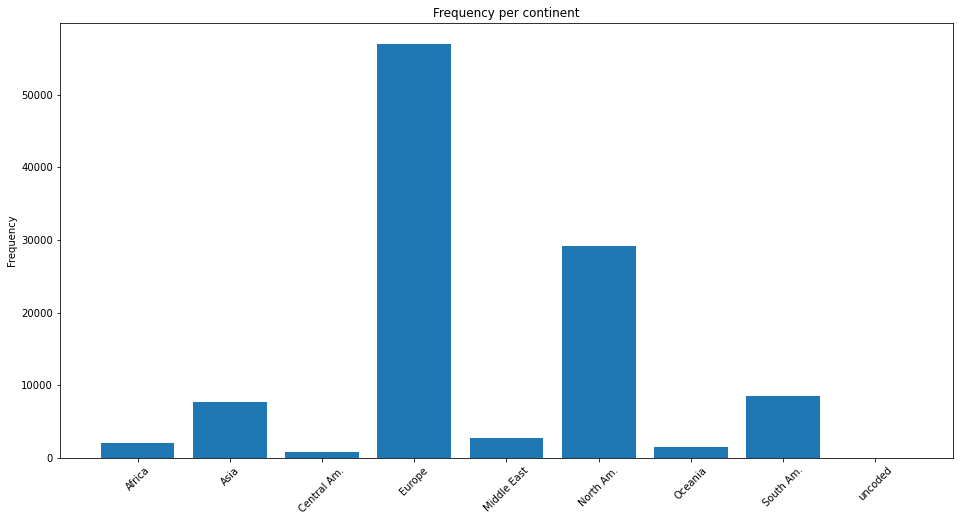

In [84]:
# Distribution per year

objects = [l for l in df_coded_nat.index]
eff = [l for l in df_coded_nat['frequency']]

p1 = plt.bar(objects, eff)

#plt.xticks(l5Years)
plt.ylabel('Frequency')
plt.title('Frequency per continent')
plt.gcf().set_size_inches(16, 8)
#plt.gca().axes.get_xaxis().set_visible(False)
#plt.savefig('exported_pictures/nationalities/Frequency_continent.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()



## Distribution of nationalities over time

Now, we examine the distribution of the nationalities (with the continent) over time (1771 until now).

In [140]:
values_l = [x[0] for x in sorted_coded_nat_list]
values_l

['Europe',
 'North Am.',
 'South Am.',
 'Asia',
 'Middle East',
 'Africa',
 'Oceania',
 'Central Am.',
 'uncoded']

In [141]:
### Transform year into integers
int_coded_nat_list = [[int(l[0]), l[1]] for l in coded_nat_list]
int_coded_nat_list[:5]

[[1959, 'North Am.'],
 [1927, 'North Am.'],
 [1955, 'North Am.'],
 [1927, 'North Am.'],
 [1827, 'North Am.']]

In [142]:
### Create a list with intervals of 20 years.

def create_years_list(period = 10, y_start = 1791, y_end = 1801):

    y_list = []
    y_list.append(y_start)

    while y_start < y_end:
        y_start += period
        y_list.append(y_start)
    return y_list

In [143]:
def interactive_nationality_periods(nationality, period = 10, remaining = False):
    
    output_l = []
    work_l = int_coded_nat_list # The year must be integers
    for a in nationality:
        prov_l = []
        for l in work_l:            
            if a == l[1]:
                output_l.append(l)
            else:
                prov_l.append(l)
        work_l = prov_l

    print('Number of nationalities chosen: ', len(output_l))
    print('The other (nationalitiesunchosen): ',len(work_l))
    # print('\n-----')
    
    period = period # 20 10
    y_list = create_years_list(period = period, y_start = 1771, y_end = 1920)
    
    
    
    with plt.style.context("ggplot"):
                
        fig, ax = plt.subplots(figsize=(16,8)) 


        width =  period - (period * 10 / 100)

        bottom_list = []
        i = 0
        while i < len(y_list):
            bottom_list.append(0)
            i += 1

        if remaining:
            i_list = []
            for i in y_list:
                i_n = 0
                for l in work_l:
                    if int(l[0]) >= i and int(l[0]) < (i + period):
                        i_n += 1
                i_list.append([i, i_n]) 
            # print('BBB: ', i_list)            
            draw_l = [i[1] for i in i_list]
            ax.bar(y_list, draw_l, width, bottom = bottom_list, label='remaining' )
            bottom_list = [x + y for x, y in zip(bottom_list, draw_l)]


        for a in nationality:
            i_list = []
            for i in y_list:
                i_n = 0
                for l in output_l:
                    if l[1] == a and int(l[0]) >= i and int(l[0]) < (i + period):
                        i_n += 1
                i_list.append([i, i_n]) 
            # print('AAA: ', i_list)            
            draw_l = [i[1] for i in i_list]
            ax.bar(y_list, draw_l, width, bottom = bottom_list, label=a )
            bottom_list = [x + y for x, y in zip(bottom_list, draw_l)]
            # print(bottom_list)

        ax.set_ylabel('Frequency')
        ax.set_title('Frequency per nationality')
        
        plt.xticks(y_list,rotation=45)

        ax.legend()

        p_out = plt.show()


In [144]:
# Frequency per nationality with intervals of 10 years.

k = interactive(interactive_nationality_periods, nationality=SelectMultiple(
    options=sorted(values_l),
    value=['Europe'], # You can chose the continent, you want to visualize (one or more)
    description='Number of nationalities chosen: ',
    disabled=False
),  period=IntSlider(min=5, max=50, step=5, value=5),
    remaining = Checkbox(
    value=False,
    description='The other (nationalities unchosen):',
    disabled=False
))



Number of nationalities chosen:  57007
The other (nationalitiesunchosen):  52449


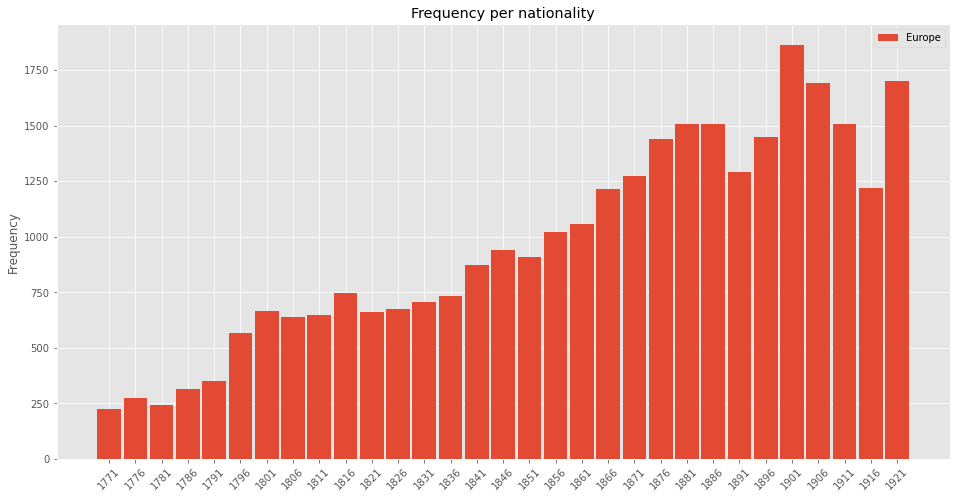

In [145]:
display(k)

In [99]:
# Frequency per nationality with intervals of 20 years.

k = interactive(interactive_nationality_periods, nationality=SelectMultiple(
    options=sorted(values_l),
    value=['Asia','Europe', 'North Am.'],
    #rows=10,
    description='Number of nationalities chosen: ',
    disabled=False
),  period=IntSlider(min=5, max=50, step=5, value=20),
    remaining = Checkbox(
    value=False,
    description='The other (nationalities unchosen):',
    disabled=False
))



Number of nationalities chosen:  94973
The other (nationalitiesunchosen):  15094


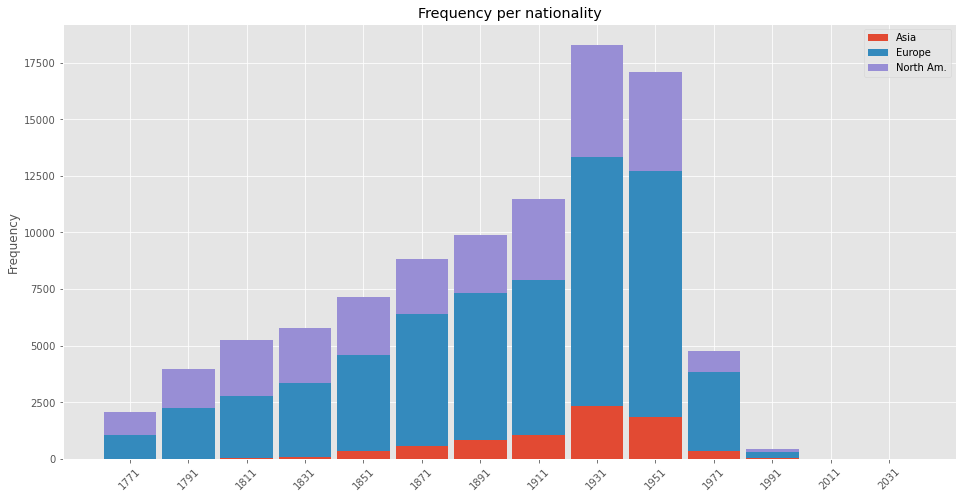

In [35]:
display(k)

## Analysis of the nationalities per occupation

Below, we analyse the nationalities comparing the number of "jurists" and "economist". We will use again use the continent to aggregate the nationalities and better visualize them. 

In [31]:
## It's define the database ligne to use
pk_query = 105

# Connexion to the database
original_db = 'data/sparql_queries.db'
conn = sql.connect(original_db)

c = conn.cursor()

c.execute('SELECT * FROM query WHERE pk_query = ?', [pk_query]) ### a list around argument is needed for a string longer then one

rc = c.fetchone()

# close connexion
conn.close()


In [32]:
#print(rc[2] +  "\n-----\n" + rc[4] +  "\n-----\n" +   rc[7]+  "\n\n\n------------------\n" +  rc[5] + "\n\n\n------------------\n")

In [33]:
### Execute the SPARQL query wrapped in the function in the library _sparql_functions.py_
# The first setting correspond to SPARQL Endpoint, the seconde to the query
q = spqf.get_json_sparql_result(rc[4],rc[5])

<class 'dict'>


In [34]:
##### Transform the result into a list with a fonction of the library #####
#### Result of the query
r_query = [l for l in spqf.sparql_result_to_list(q)]
print(len(r_query))
#r_query

118175


In [36]:
df_occ_gend = pd.DataFrame(r_query)
df_occ_gend.columns =['uri_entity', 'year', 'nationality', 'occupation', 'gender'] # We already add the column "gender" for after.
df_occ_gend[:50]

,uri_entity,year,nationality,occupation,gender
0,urn:uuid:fb3527da-478c-4e4f-a861-9de00b9d154b,1959,Canada,economist,male
1,urn:uuid:5c7f3133-a15b-4f35-8e17-162cf63207f7,1809,United States of America,jurist,male
2,urn:uuid:92ebbd17-f4d1-4cdd-816c-5fcf4ba34dce,1912,Germany,jurist|jurist,female
3,urn:uuid:9ce56c33-08da-497c-afb0-38cb6ff6536c,1884,United States of America,jurist,male
4,urn:uuid:2178758f-d8df-447d-b64b-bd78dfe045b7,1940,Ukraine,economist,male
5,urn:uuid:490ab506-b377-4e39-bf39-3d6e3f732a62,1907,United States of America,jurist,male
6,urn:uuid:8b81cd5a-63af-4905-817e-9dcea33ae252,1939,Germany,jurist,male
7,urn:uuid:0a98b4ed-2ecf-4a4f-8250-e405279d4f64,1965,Germany,jurist,male
8,urn:uuid:13dbca6a-92fc-4582-8d38-796577b4c0d0,1864,Hungary,jurist|jurist,male
9,urn:uuid:41ad1b0e-5f5e-43b6-9137-ea5f6bfe3cf4,1927,Canada,jurist|jurist,male


In [37]:
df_occ_gend.to_csv('spreadsheets/df_nationalities_occ_gender.csv', sep="|",index=False)

In [4]:
df_occ_gend= pd.read_csv("spreadsheets/df_nationalities_occ_gender.csv", sep="|")
df_occ_gend

,uri_entity,year,nationality,occupation,gender
0,urn:uuid:fb3527da-478c-4e4f-a861-9de00b9d154b,1959,Canada,economist,male
1,urn:uuid:5c7f3133-a15b-4f35-8e17-162cf63207f7,1809,United States of America,jurist,male
2,urn:uuid:92ebbd17-f4d1-4cdd-816c-5fcf4ba34dce,1912,Germany,jurist|jurist,female
3,urn:uuid:9ce56c33-08da-497c-afb0-38cb6ff6536c,1884,United States of America,jurist,male
4,urn:uuid:2178758f-d8df-447d-b64b-bd78dfe045b7,1940,Ukraine,economist,male
...,...,...,...,...,...
118170,urn:uuid:f643e2e7-46c9-4fed-90ce-8c2070ca741a,1875,British India,jurist|economist,male
118171,urn:uuid:f643e2e7-46c9-4fed-90ce-8c2070ca741a,1875,India,jurist|economist,male
118172,urn:uuid:f643e2e7-46c9-4fed-90ce-8c2070ca741a,1875,Dominion of India,jurist|economist,male
118173,urn:uuid:76d4e7fe-6389-43b3-920e-c322122dfa66,1953,United Kingdom,jurist,male


In [6]:
### change the values of occupations to have only three subpopulations, "economist", "jurist" and "jurist/economist".
### change the values of genders to haves only three values "female", "male" and "other"

# Jurist
df_occ_gend['occupation'].replace(["jurist|jurist", "jurist|jurist|jurist", "jurist|jurist|jurist|jurist", "legal jurist in France", "jurist|legal jurist in France"],'jurist',inplace=True)
# Jurist/economist
df_occ_gend['occupation'].replace(["jurist|jurist|economist", "jurist|jurist|jurist|economist", "jurist|jurist|jurist|jurist", "jurist|economist|jurist", "economist|jurist", "jurist|economist"],'jurist/economist',inplace=True)
# Gender
df_occ_gend['gender'].replace(['transgender male', 'transgender female', 'transfeminine', 'non-binary','intersex'],'other',inplace=True)
df_occ_gend[:10]
print(len(df_occ_gend))

118175


In [8]:
### drop duplicates
## Each person has one year and one continent 
# (unless if his nationalities are on more than one continent)
df_result_drop = df_occ_gend[['uri_entity','year','nationality', 'occupation', 'gender']].drop_duplicates()
print(len(df_result_drop))
df_result_drop[:50]

118175


,uri_entity,year,nationality,occupation,gender
0,urn:uuid:fb3527da-478c-4e4f-a861-9de00b9d154b,1959,Canada,economist,male
1,urn:uuid:5c7f3133-a15b-4f35-8e17-162cf63207f7,1809,United States of America,jurist,male
2,urn:uuid:92ebbd17-f4d1-4cdd-816c-5fcf4ba34dce,1912,Germany,jurist,female
3,urn:uuid:9ce56c33-08da-497c-afb0-38cb6ff6536c,1884,United States of America,jurist,male
4,urn:uuid:2178758f-d8df-447d-b64b-bd78dfe045b7,1940,Ukraine,economist,male
5,urn:uuid:490ab506-b377-4e39-bf39-3d6e3f732a62,1907,United States of America,jurist,male
6,urn:uuid:8b81cd5a-63af-4905-817e-9dcea33ae252,1939,Germany,jurist,male
7,urn:uuid:0a98b4ed-2ecf-4a4f-8250-e405279d4f64,1965,Germany,jurist,male
8,urn:uuid:13dbca6a-92fc-4582-8d38-796577b4c0d0,1864,Hungary,jurist,male
9,urn:uuid:41ad1b0e-5f5e-43b6-9137-ea5f6bfe3cf4,1927,Canada,jurist,male


In [9]:
# Add the continent of the individuals
merged = pd.merge(df_result_drop,nat_coded, on='nationality', sort=False)
print(len(merged))
merged.sort_values(by=['uri_entity']).loc[30:50]

NameError: name 'nat_coded' is not defined

In [51]:
coded_nationalities = merged[['uri_entity','year','continent', 'occupation', 'gender']].drop_duplicates()
print(len(merged))
coded_nationalities[:10]

118175


,uri_entity,year,continent,occupation,gender
0,urn:uuid:fb3527da-478c-4e4f-a861-9de00b9d154b,1959,North Am.,economist,male
1,urn:uuid:41ad1b0e-5f5e-43b6-9137-ea5f6bfe3cf4,1927,North Am.,jurist,male
2,urn:uuid:98651569-7301-4398-a760-bcb03931dc0f,1955,North Am.,jurist,male
3,urn:uuid:080c5cc7-c62c-46ec-b0e9-0b98b6adc235,1927,North Am.,economist,male
4,urn:uuid:f967d755-8e28-4729-9966-1aa3e0bdba98,1827,North Am.,jurist,male
5,urn:uuid:50628dbc-50cd-4fd7-93f6-a444c2dac636,1860,North Am.,jurist,male
6,urn:uuid:d5e86bba-4821-421e-9706-438a58c978a3,1873,North Am.,jurist,male
7,urn:uuid:84d140c5-57f6-4a86-a8d2-280219e33b79,1882,North Am.,jurist,male
8,urn:uuid:c9fbd132-1389-44cd-a122-50c8a27dfe45,1900,North Am.,jurist,male
9,urn:uuid:9e654a4d-24d5-4c27-8e3c-d6915e0a7fb6,1933,North Am.,jurist,male


In [55]:
coded_nationalities.to_csv("spreadsheets/continent_occ_gender.csv", sep="|", index="id_entity")
coded_nationalities

,uri_entity,year,continent,occupation,gender
0,urn:uuid:fb3527da-478c-4e4f-a861-9de00b9d154b,1959,North Am.,economist,male
1,urn:uuid:41ad1b0e-5f5e-43b6-9137-ea5f6bfe3cf4,1927,North Am.,jurist,male
2,urn:uuid:98651569-7301-4398-a760-bcb03931dc0f,1955,North Am.,jurist,male
3,urn:uuid:080c5cc7-c62c-46ec-b0e9-0b98b6adc235,1927,North Am.,economist,male
4,urn:uuid:f967d755-8e28-4729-9966-1aa3e0bdba98,1827,North Am.,jurist,male
...,...,...,...,...,...
118156,urn:uuid:281f347f-652c-4131-b901-99280b37484b,2000,Africa,economist,male
118158,urn:uuid:b3e926f4-c0dc-473e-82a4-b142f591fba1,1988,North Am.,jurist,male
118159,urn:uuid:26514901-ca29-42fd-84c1-fdf8ed8cc633,1944,Africa,jurist,male
118162,urn:uuid:89978157-3d82-47d1-817c-7fbe7729c52d,1956,Asia,jurist,female


### Contingency table between occupation and continent

With the contingency table, we can produce a better visualization between the both variables. This visualization is a stacked plot with the proportion of continent per occupation, at the same time, visualized in percentage and with the number of individuals.

In [50]:
### Occupation-continent contingency table with totals

X = "occupation"
Y = "continent"

contingContOcc = coded_nationalities[[X,Y]].pivot_table(index=Y,columns=X,aggfunc=len, margins=True, margins_name='All*').fillna(0).astype(int) 
# Sort the values by the total to see better with the visualization
contingContOcc = contingContOcc.sort_values(by="All*")
# Drop the column "All",  otherwise it appears as the modality in the plot
contingContOcc= contingContOcc.loc[:,contingContOcc.columns!="All*"]

contingContOcc

type,economist,jurist,jurist/economist
continent,,,
uncoded,0,6,0
Central Am.,113,662,11
Oceania,210,1318,5
Africa,483,1497,10
Middle East,696,2065,23
Asia,2646,4483,19
South Am.,1290,7049,116
North Am.,2540,26523,70
Europe,13414,43028,483


In [125]:
# change the number of individuals into a percentage
perc_contin_OC= contingContOcc.apply(lambda x: x*100/sum(x), axis=1)

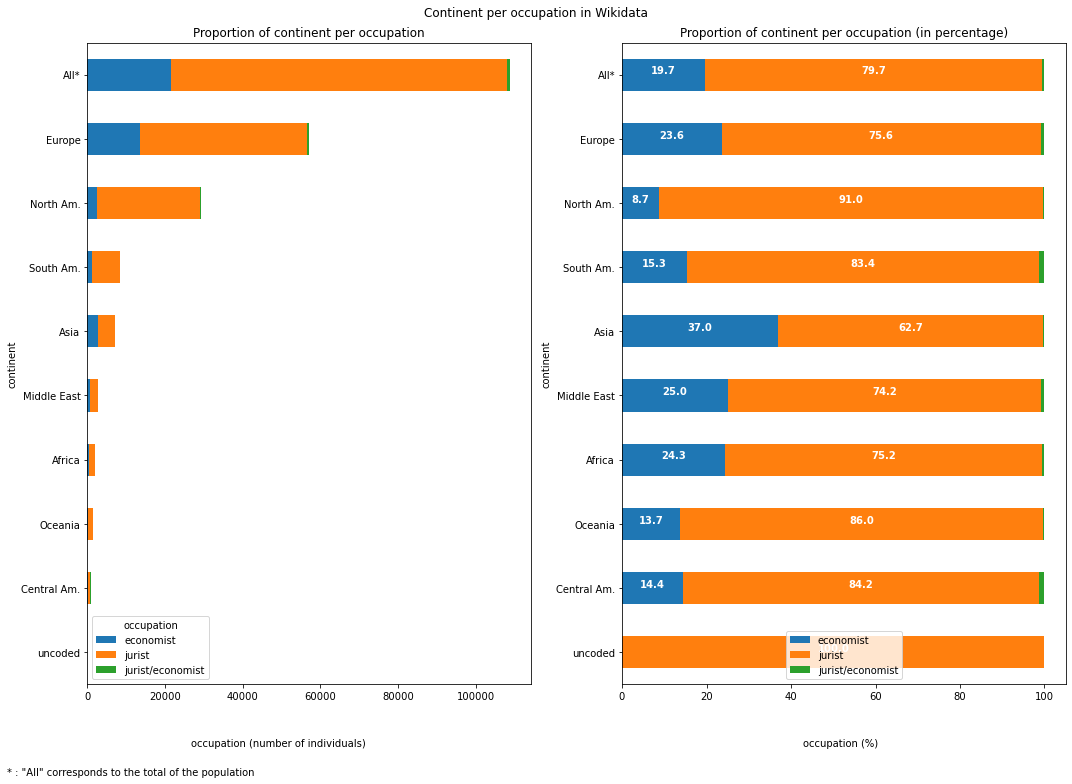

In [126]:
### create subplots side by side: 
# It is the best way, I found, but there are many other: cf. https://stackoverflow.com/questions/56121883/subplots-frequency-plots

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
fig.suptitle('Continent per occupation in Wikidata')
contingContOcc.plot( kind='barh', stacked=True, ax=ax1, title="Proportion of continent per occupation")
z_CO=perc_contin_OC.plot(kind="barh", stacked=True, ax=ax2, title="Proportion of continent per occupation (in percentage)")
plt.tight_layout()

# Set labels and legends: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html

fig.text(0.747, -0.05, 'occupation (%)', ha='left', va='bottom')
fig.text(0.180, -0.05, 'occupation (number of individuals)', ha='left', va='bottom')
fig.text(0.01, -0.09, '* : "All" corresponds to the total of the population', ha='left', va='bottom')

#  Add percentages on the right plot: cf. https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
### drop the values inferior to: https://stackoverflow.com/questions/54682665/hide-matplot-annotation-if-value-is-0 

for p in z_CO.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width >= 2:
        z_CO.annotate(format(p.get_width(), '.1f'), 
                   (p.get_x() + p.get_width()/2, p.get_y() + p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   # style = 'italic',
                   weight='bold',
                   color = 'white',
                   xytext = (0, -12), 
                   textcoords = 'offset points')

plt.legend(loc='lower center')
plt.show()

## Analysis of the continent per gender

After to have analyse the continent per occupation, we will realise the same method to analyse the genders. 

### Contingency table between gender and continent

With the contingency table, we can produce a better visualization between the both variables. This visualization is a stacked plot with the proportion of continent per gender (in percentage).

In [127]:
### Gender-continent contingency table with totals

X = "gender"  
Y = "continent"

contingContGend = coded_nationalities[[X,Y]].pivot_table(index=Y,columns=X,aggfunc=len, margins=True, margins_name='All*').fillna(0).astype(int) 
contingContGend = contingContGend.sort_values(by="All*")
contingContGend= contingContGend.loc[:,contingContGend.columns!="All*"]

In [128]:
### Gender-continent contingency table with totals in percentage 

perc_contin_CG = contingContGend.apply(lambda x: x*100/sum(x), axis=1)

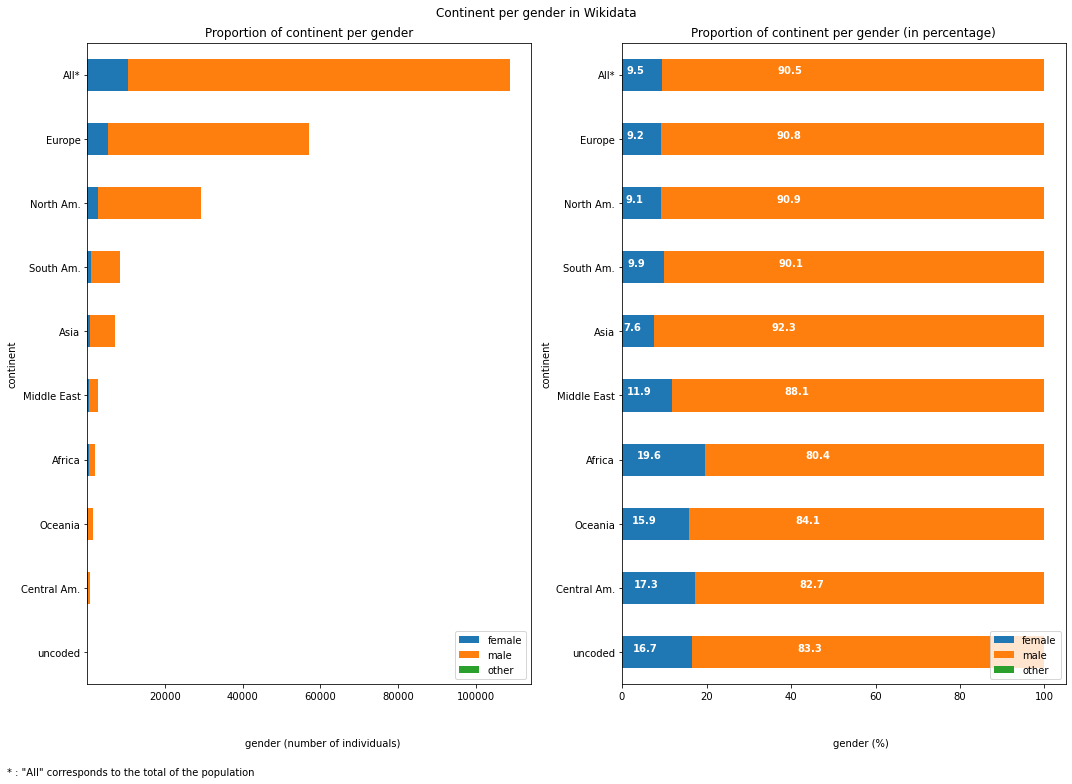

In [129]:
### create subplots side by side: 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
fig.suptitle('Continent per gender in Wikidata')
contingContGend.plot( kind='barh', stacked=True, ax=ax1, title="Proportion of continent per gender")
z_CG=perc_contin_CG.plot(kind="barh", stacked=True, ax=ax2, title="Proportion of continent per gender (in percentage)")
plt.tight_layout()

# Set labels and legends

fig.text(0.775, -0.05, 'gender (%)', ha='left', va='bottom')
fig.text(0.230, -0.05, 'gender (number of individuals)', ha='left', va='bottom')
fig.text(0.01, -0.09, '* : "All" corresponds to the total of the population', ha='left', va='bottom')

# Set percentage on the plot: 
for p in z_CG.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width >= 2:
        z_CG.annotate(format(p.get_width(), '.1f'), 
                   (p.get_x() + p.get_width()/3, p.get_y() + p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   weight='bold',
                   color = 'white',
                   xytext = (0, -12),
                   textcoords = 'offset points')
        
ax1.legend(loc='lower right')
ax2.legend(loc='lower right')

plt.show()

## Continents per generation

In [143]:
### Generations-continents contingency table with totals

X = "generation"  
Y = "continent"

generation_continent_margins = coded_nationalities_generation[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len, margins=True).fillna(0).astype(int) 
generation_continent_margins= generation_continent_margins.loc[:,generation_continent_margins.columns!="uncoded"]
generation_continent_margins


continent,Africa,Asia,Central Am.,Europe,Middle East,North Am.,Oceania,South Am.,All
generation,,,,,,,,,
1771-1791,1,1,12,1052,1,1015,8,108,2198
1791-1811,5,2,21,2215,8,1724,21,157,4153
1811-1831,13,13,22,2728,3,2493,33,258,5565
1831-1851,16,82,31,3249,17,2404,81,377,6257
1851-1871,32,352,44,4196,41,2541,115,427,7749
1871-1891,57,556,32,5722,121,2429,112,552,9582
1891-1911,83,799,56,6284,260,2543,145,780,10950
1911-1931,228,1032,105,6478,494,3594,164,1093,13188
1931-1951,628,2156,194,10631,764,4953,406,1699,21433


In [144]:
### Generations-continents contingency table with totals in percentage 
pd.options.display.float_format = '{0:3.4}'.format
generation_continent_margins.apply(lambda x: x*100/sum(x[-1:]), axis=1)

continent,Africa,Asia,Central Am.,Europe,Middle East,North Am.,Oceania,South Am.,All
generation,,,,,,,,,
1771-1791,0.0455,0.0455,0.546,47.86,0.0455,46.18,0.364,4.914,100.0
1791-1811,0.1204,0.04816,0.5057,53.33,0.1926,41.51,0.5057,3.78,100.0
1811-1831,0.2336,0.2336,0.3953,49.02,0.05391,44.8,0.593,4.636,100.0
1831-1851,0.2557,1.311,0.4954,51.93,0.2717,38.42,1.295,6.025,100.0
1851-1871,0.413,4.543,0.5678,54.15,0.5291,32.79,1.484,5.51,100.0
1871-1891,0.5949,5.803,0.334,59.72,1.263,25.35,1.169,5.761,100.0
1891-1911,0.758,7.297,0.5114,57.39,2.374,23.22,1.324,7.123,100.0
1911-1931,1.729,7.825,0.7962,49.12,3.746,27.25,1.244,8.288,100.0
1931-1951,2.93,10.06,0.9051,49.6,3.565,23.11,1.894,7.927,100.0


In [145]:
generation_continent_margins.iat[-1,-1]

81075

In [146]:


tx = generation_continent_margins.loc[:,["All"]]
ty = generation_continent_margins.loc[["All"],:]
n = generation_continent_margins.iat[-1,-1] 

### Compute the matrix multiplication between the columns.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dot.html
indep = tx.dot(ty) / n
#pd.options.display.float_format = '{0:3.5}'.format

# Rounded
print(indep.astype(int))



continent   Africa  Asia  Central Am.  Europe  Middle East  North Am.  \
generation                                                              
1771-1791       28   135           14    1153           46        642   
1791-1811       54   255           26    2179           87       1213   
1811-1831       72   342           35    2920          117       1626   
1831-1851       82   385           39    3284          131       1828   
1851-1871      101   477           49    4067          163       2264   
1871-1891      125   590           61    5029          201       2800   
1891-1911      143   674           69    5747          230       3200   
1911-1931      172   812           84    6922          277       3854   
1931-1951      281  1319          136   11249          451       6264   
All           1063  4993          517   42555         1709      23696   

continent   Oceania  South Am.    All  
generation                             
1771-1791        29        147   2198  
179

In [147]:
### The difference in number of individuals between the theoretical and the observe
### Doc. :
#  https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2
deviations = (generation_continent_margins-indep)

print(deviations.astype(int))

continent   Africa  Asia  Central Am.  Europe  Middle East  North Am.  \
generation                                                              
1771-1791      -27  -134           -2    -101          -45        372   
1791-1811      -49  -253           -5      35          -79        510   
1811-1831      -59  -329          -13    -192         -114        866   
1831-1851      -66  -303           -8     -35         -114        575   
1851-1871      -69  -125           -5     128         -122        276   
1871-1891      -68   -34          -29     692          -80       -371   
1891-1911      -60   124          -13     536           29       -657   
1911-1931       55   219           20    -444          216       -260   
1931-1951      346   836           57    -618          312      -1311   
All              0     0            0       0            0          0   

continent   Oceania  South Am.  All  
generation                           
1771-1791       -21        -39    0  
1791-1811

In [148]:
weighted_deviations = (generation_continent_margins-indep)**2/indep
weighted_deviations

continent,Africa,Asia,Central Am.,Europe,Middle East,North Am.,Oceania,South Am.,All
generation,,,,,,,,,
1771-1791,26.85,133.4,0.29,8.964,44.35,216.1,15.59,10.71,0.0
1791-1811,44.91,251.8,1.135,0.567,72.27,214.4,21.51,53.5,0.0
1811-1831,49.28,317.2,5.126,12.75,111.4,461.6,23.1,36.06,0.0
1831-1851,53.16,238.8,1.985,0.3773,100.1,181.0,0.08936,4.536,0.0
1851-1871,47.68,32.86,0.5932,4.071,91.63,33.68,1.231,16.96,0.0
1871-1891,37.49,1.971,13.86,95.37,32.47,49.3,2.055,13.21,0.0
1891-1911,25.55,23.04,2.738,50.08,3.69,135.0,0.01619,2.604,0.0
1911-1931,17.55,59.49,5.195,28.5,167.8,17.6,0.884,48.01,0.0
1931-1951,428.4,529.5,24.04,34.04,215.8,274.5,49.51,46.18,0.0


In [149]:
import seaborn as sns


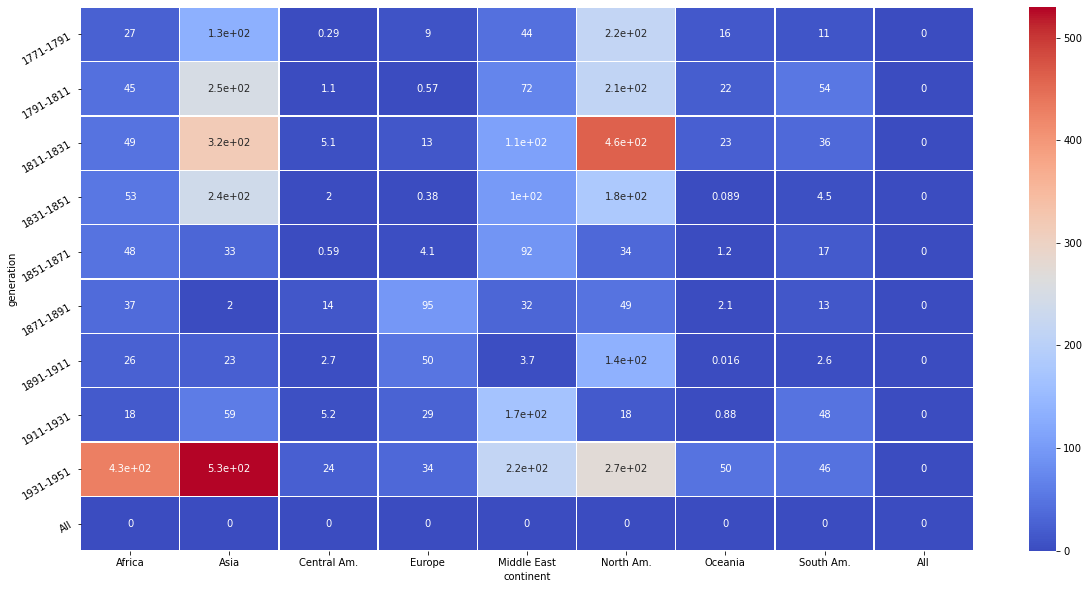

In [150]:
# Heatmap of the difference between the theorical and the observed in number of individuals 
#xi_n = measure.sum().sum()
#table = measure/xi_n
fig, ax = plt.subplots(figsize=(20,10))         
# Sample figsize in inches
g = sns.heatmap(weighted_deviations, annot=weighted_deviations, cmap="coolwarm", linewidths=.5, ax=ax)
labels = weighted_deviations.index
p = g.set_yticklabels(labels, rotation=30)



## Contingency table between continent and generation

In [16]:
#Check the data type of year
print(coded_nationalities.dtypes)
min(coded_nationalities['year']), max(coded_nationalities['year'])

uri_entity    object
year           int64
continent     object
occupation    object
gender        object
dtype: object


(1770, 2020)

In [51]:
# Create a list of generation (twenty years) periods
d20List = []
period = 20
d_start = 1771
i = 0
d20List.append(d_start)

while i < 11:
    d_start = d_start + period
    d20List.append(d_start)
    i += 1

In [52]:
# Copy the dataframe for do not work on it.
coded_nationalities_generation = coded_nationalities.copy(deep=True)
# Keep only the people born before 1950 (because as we can see above the number of individuals after 1950 decreases strongly,
# it is very probably a biais on the datas does not enter in Wikidata yet)
coded_nationalities_generation= coded_nationalities_generation[coded_nationalities_generation["year"]<=1950]
# add a column and cut individuals by their date of birth with the list just above.
coded_nationalities_generation['generation'] = pd.cut(coded_nationalities['year'], d20List, right=False)

In [15]:
coded_nationalities_generation

NameError: name 'coded_nationalities_generation' is not defined

In [54]:
# improve the code by changing it to "YYYY-YYYY" format
coded_nationalities_generation['generation'] = coded_nationalities_generation['generation'].apply(lambda row : str(int(row.left))+'-'+str(int(row.right)))


In [55]:
coded_nationalities_generation

,uri_entity,year,continent,occupation,gender,generation
1,urn:uuid:41ad1b0e-5f5e-43b6-9137-ea5f6bfe3cf4,1927,North Am.,jurist,male,1911-1931
3,urn:uuid:080c5cc7-c62c-46ec-b0e9-0b98b6adc235,1927,North Am.,economist,male,1911-1931
4,urn:uuid:f967d755-8e28-4729-9966-1aa3e0bdba98,1827,North Am.,jurist,male,1811-1831
5,urn:uuid:50628dbc-50cd-4fd7-93f6-a444c2dac636,1860,North Am.,jurist,male,1851-1871
6,urn:uuid:d5e86bba-4821-421e-9706-438a58c978a3,1873,North Am.,jurist,male,1871-1891
...,...,...,...,...,...,...
118152,urn:uuid:3562befa-695e-4565-a071-0db205314f58,1948,Africa,economist,male,1931-1951
118154,urn:uuid:44a1d40e-353a-4009-94af-2f41564415d8,1825,South Am.,jurist,male,1811-1831
118155,urn:uuid:2713b0cc-d39c-47ed-ac4a-c7d43c7bbf4c,1918,Africa,jurist,male,1911-1931
118159,urn:uuid:26514901-ca29-42fd-84c1-fdf8ed8cc633,1944,Africa,jurist,male,1931-1951


In [56]:
# Construct a dateframe with the number of individuals by generation
pt_generation = pd.pivot_table(coded_nationalities_generation, index=['generation'], values='year', aggfunc=len,fill_value=0)
print(type(pt_generation))
pt_generation

<class 'pandas.core.frame.DataFrame'>


,year
generation,
1771-1791,2198
1791-1811,4153
1811-1831,5565
1831-1851,6257
1851-1871,7749
1871-1891,9582
1891-1911,10950
1911-1931,13188
1931-1951,21433


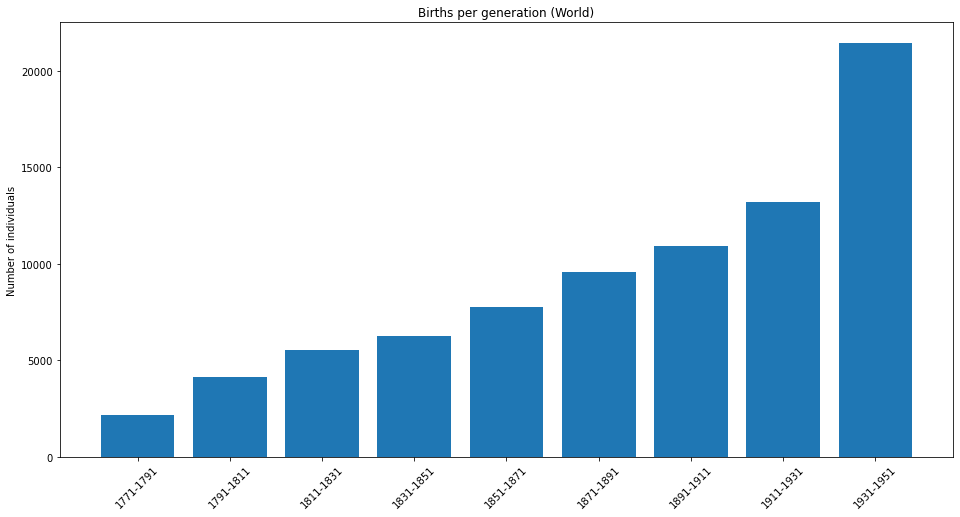

In [58]:
# Plot with number of individuals per generation
objects = [l for l in pt_generation.index]
eff = [l for l in pt_generation['year']]

p1 = plt.bar(objects, eff)

plt.ylabel('Number of individuals')
plt.title('Births per generation (World)')
plt.gcf().set_size_inches(16, 8)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
# plt.savefig('exported_pictures/effectifs_annees_reference_par_periode.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()

In [139]:
### Generation-Continent Contingency table

X = "generation"  
Y = "continent"

generation_continent = coded_nationalities_generation[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len).fillna(0).astype(int) 
generation_continent



continent,Africa,Asia,Central Am.,Europe,Middle East,North Am.,Oceania,South Am.,uncoded
generation,,,,,,,,,
1771-1791,1,1,12,1052,1,1015,8,108,0
1791-1811,5,2,21,2215,8,1724,21,157,0
1811-1831,13,13,22,2728,3,2493,33,258,2
1831-1851,16,82,31,3249,17,2404,81,377,0
1851-1871,32,352,44,4196,41,2541,115,427,1
1871-1891,57,556,32,5722,121,2429,112,552,1
1891-1911,83,799,56,6284,260,2543,145,780,0
1911-1931,228,1032,105,6478,494,3594,164,1093,0
1931-1951,628,2156,194,10631,764,4953,406,1699,2


In [140]:
# change the number of individuals into a percentage
perc_contin = generation_continent.apply(lambda x: x*100/sum(x), axis=1)

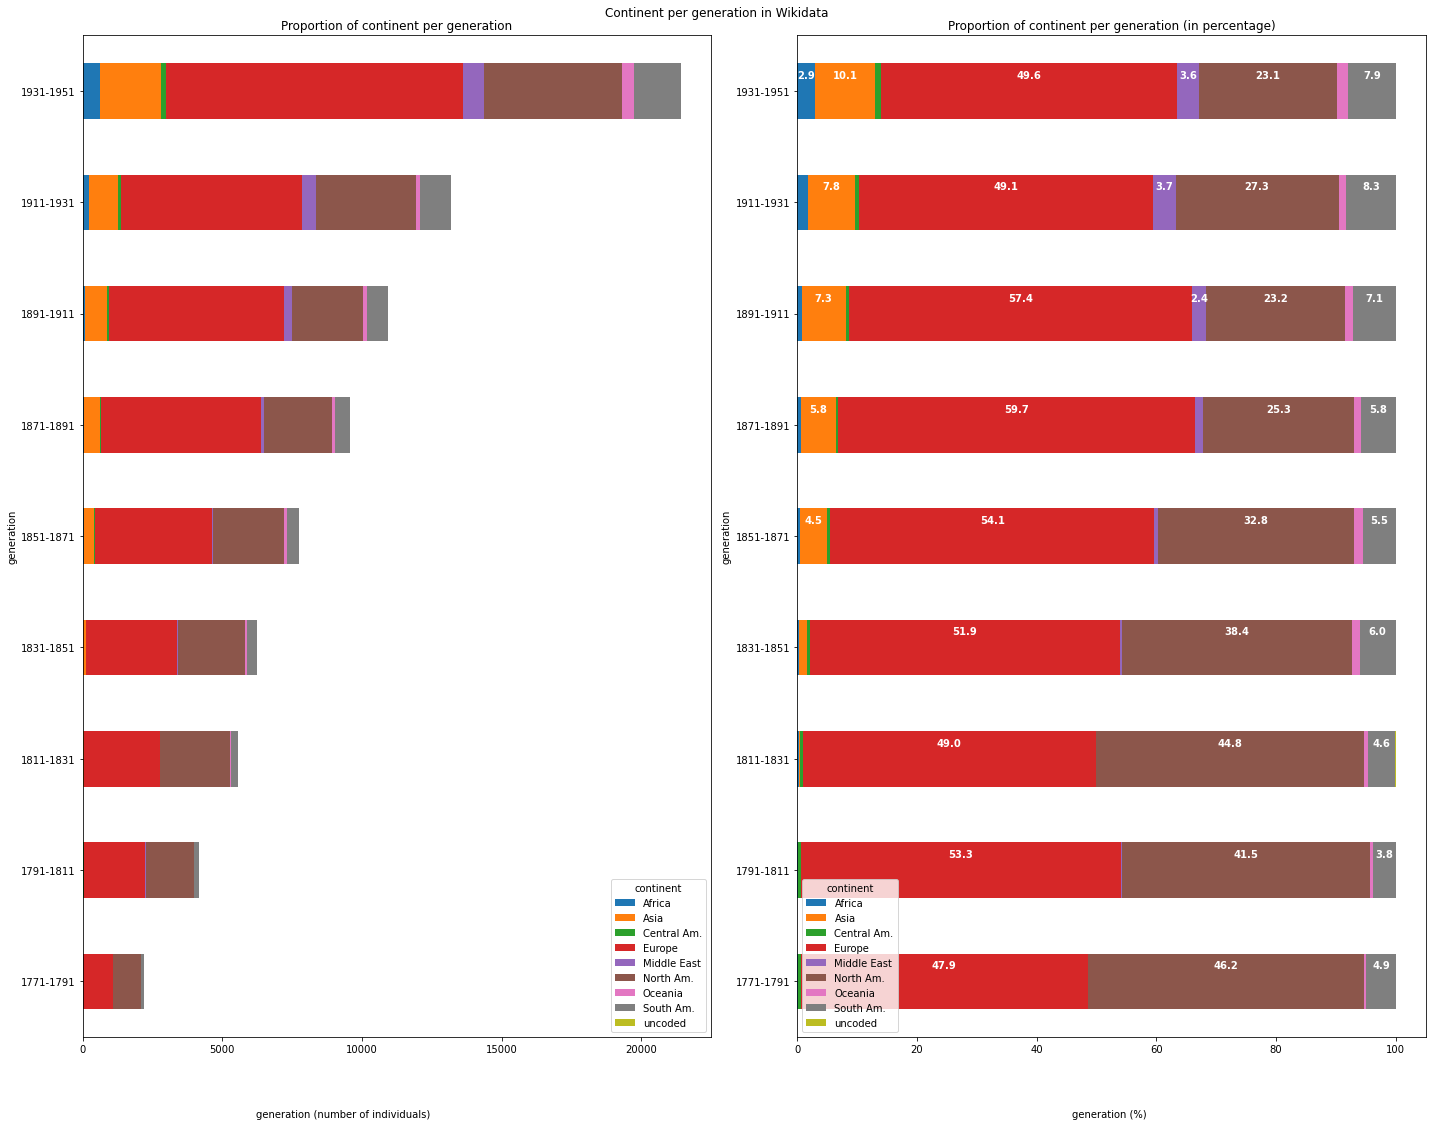

In [141]:
# create subplots side by side:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 15))
fig.suptitle('Continent per generation in Wikidata')
generation_continent.plot( kind='barh', stacked=True, ax=ax1, title="Proportion of continent per generation")
z_cont=perc_contin.plot(kind="barh", stacked=True, ax=ax2, title="Proportion of continent per generation (in percentage)")
plt.tight_layout()

# Set labels and legends

fig.text(0.747, -0.05, 'generation (%)', ha='left', va='bottom')
fig.text(0.180, -0.05, 'generation (number of individuals)', ha='left', va='bottom')

#  Add percentages on the right plot: 

for p in z_cont.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width >= 2:
        z_cont.annotate(format(p.get_width(), '.1f'), 
                   (p.get_x() + p.get_width()/2, p.get_y() + p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   # style = 'italic',
                   weight='bold',
                   color = 'white',
                   xytext = (0, -12), 
                   textcoords = 'offset points')

ax1.legend( title= "continent", loc='lower right')
ax2.legend( title= "continent",loc='lower left')

plt.show()

# Focus on Europe

Now, we will focus on Europe. First of all, it is the continent with the most individuals. Then, there is a lot of countries in, so we can realize a new slicing, by European regions. These regions are thought in part with the United Nations geoscheme (https://en.wikipedia.org/wiki/United_Nations_geoscheme) and The World Factbook (https://en.wikipedia.org/wiki/Eastern_Europe)

These regions (with the current countries) are: 
* Britain Isles : 
    - United Kingdom
    - Ireland
* Western Europe: 
    - France
    - Netherlands 
    - Belgium
    - Luxembourg
    - Switzerland
* Scandinavia: 
    - Scandinavian countries
* Central Europe: 
    - Germany
    - Austria
    - Czech Republic
    - Poland
    - Hungary
    - Slovakia
    - Liechtenstein
    - Slovenia
* Southeastern Europe:
    - Balkans
    - Roumania
    - Bulgaria
    - Cyprus
* Southern Europe:
    - Italy
    - Spain
    - Portugal
    - Andorra
    - Malta
* Eastern Europe:
    - Baltic states
    - Russia
    - Ukraine
    - Byelorussia
    - Georgia

In [ ]:
nation_coded= pd.read_csv("spreadsheets/nationalities_coded.csv", sep="|")
europe= nation_coded[nation_coded['continent']=='Europe']
print(europe[:30])

In [9]:
europe.to_csv('spreadsheets/europe.csv', sep="|",index=False)

In [11]:
europe=pd.read_csv("spreadsheets/europe.csv", sep="|")

In [12]:
europe.head()

,nationality,freq,code,continent,region
0,Germany,12223,Germa,Europe,Central Europe
1,Spain,5396,Spain,Europe,Southern Europe
2,France,3933,Franc,Europe,Western Europe
3,United Kingdom,3853,Unite,Europe,British Isles
4,Poland,3016,Polan,Europe,Central Europe


In [13]:
# Add the continent of the individuals
merged_euro= pd.merge(df_result_drop,europe, on='nationality', sort=False)
print(len(merged_euro))
merged_euro=merged_euro[['uri_entity','year', 'occupation','region', 'gender']].drop_duplicates()
merged_euro.head()

64609


,uri_entity,year,occupation,region,gender
0,urn:uuid:92ebbd17-f4d1-4cdd-816c-5fcf4ba34dce,1912,jurist,Central Europe,female
1,urn:uuid:8b81cd5a-63af-4905-817e-9dcea33ae252,1939,jurist,Central Europe,male
2,urn:uuid:0a98b4ed-2ecf-4a4f-8250-e405279d4f64,1965,jurist,Central Europe,male
3,urn:uuid:f526bf21-41c1-4a78-b1fc-3fea7e317611,1777,jurist,Central Europe,male
4,urn:uuid:54f66a96-ec77-4151-8230-92024eae9807,1886,jurist,Central Europe,male


In [14]:
merged_euro.to_csv('spreadsheets/europe_indi.csv', sep="|",index=False)

In [14]:
### Group in series per continent
gb_coded_europe = merged_euro.groupby('region').size()
gb_euro=gb_coded_europe.sort_values(ascending = False)

In [15]:
### Transform the object 'Series' into a DataFrame and add the label of the 'frequency' column
# continent is defined as an index
gb_coded_euro = gb_euro.to_frame()
gb_coded_euro.columns = ['frequency']


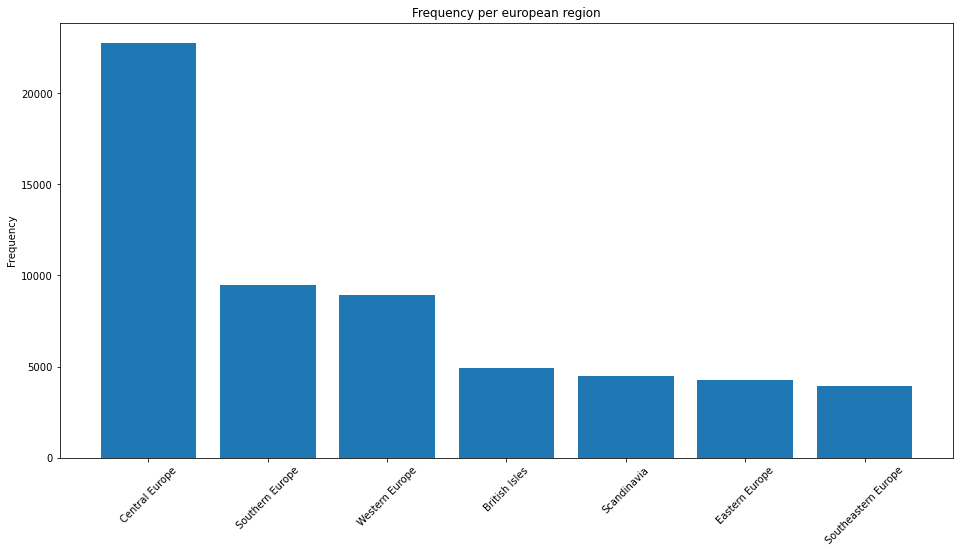

In [16]:
# Distribution per European region

objects = [l for l in gb_coded_euro.index]
eff = [l for l in gb_coded_euro['frequency']]

p1 = plt.bar(objects, eff)

plt.ylabel('Frequency')
plt.title('Frequency per European region')
plt.gcf().set_size_inches(16, 8)
#plt.gca().axes.get_xaxis().set_visible(False)
#plt.savefig('exported_pictures/nationalities/Frequency_region_europe.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()



In [17]:
# Transform into a list
coded_euro_list = merged_euro[['year', 'region']].values.tolist()
print(len(coded_euro_list))
coded_euro_list[:10]

58714


[[1912, 'Central Europe'],
 [1939, 'Central Europe'],
 [1965, 'Central Europe'],
 [1777, 'Central Europe'],
 [1886, 'Central Europe'],
 [1990, 'Central Europe'],
 [1805, 'Central Europe'],
 [1913, 'Central Europe'],
 [1956, 'Central Europe'],
 [1911, 'Central Europe']]

In [18]:
### Group the list per continent
counter= Counter([t[1] for t in coded_euro_list])
c_coded_euro_list = list(zip(counter.keys(), counter.values()))
sorted_coded_euro_list = sorted(c_coded_euro_list, key=itemgetter(1), reverse=True)
sorted_coded_euro_list

[('Central Europe', 22734),
 ('Southern Europe', 9472),
 ('Western Europe', 8938),
 ('British Isles', 4917),
 ('Scandinavia', 4475),
 ('Eastern Europe', 4265),
 ('Southeastern Europe', 3913)]

In [19]:
values_l = [x[0] for x in sorted_coded_euro_list]

In [20]:
### Transform year into integers
int_coded_euro_list = [[int(l[0]), l[1]] for l in coded_euro_list]

In [26]:
### Create a list with intervals of 10 years.

def create_years_list(period = 10, y_start = 1791, y_end = 1801):

    y_list = []
    y_list.append(y_start)

    while y_start < y_end:
        y_start += period
        y_list.append(y_start)
    return y_list

In [36]:
def interactive_region_periods(region, period = 10, remaining = False):
    
    output_l = []
    work_l = int_coded_euro_list # The year must be integers
    for a in region:
        prov_l = []
        for l in work_l:            
            if a == l[1]:
                output_l.append(l)
            else:
                prov_l.append(l)
        work_l = prov_l

    print('Number of regions chosen: ', len(output_l))
    print('The other (regions unchosen): ',len(work_l))
    print('\n-----')
    
    period = period
    y_list = create_years_list(period = period, y_start = 1770, y_end = 1930)
    
    with plt.style.context("ggplot"):
                
        fig, ax = plt.subplots(figsize=(16,8)) 


        width =  period - (period * 10 / 100)

        bottom_list = []
        i = 0
        while i < len(y_list):
            bottom_list.append(0)
            i += 1

            
        if remaining:
            i_list = []
            for i in y_list:
                i_n = 0
                for l in work_l:
                    if int(l[0]) >= i and int(l[0]) < (i + period):
                        i_n += 1
                i_list.append([i, i_n]) 
            draw_l = [i[1] for i in i_list]
            ax.bar(y_list, draw_l, width, bottom = bottom_list, label='remaining' )
            bottom_list = [x + y for x, y in zip(bottom_list, draw_l)]
            
            
        for a in region:
            i_list = []
            for i in y_list:
                i_n = 0
                for l in output_l:
                    if l[1] == a and int(l[0]) >= i and int(l[0]) < (i + period):
                        i_n += 1
                i_list.append([i, i_n]) 
            draw_l = [i[1] for i in i_list]
            ax.bar(y_list, draw_l, width, bottom = bottom_list, label=a )
            bottom_list = [x + y for x, y in zip(bottom_list, draw_l)]
        ax.set_ylabel('Frequency')
        ax.set_title('Frequency per European region (1770-1930)')
        
        plt.xticks(y_list,rotation=45)

        ax.legend()

        p_out = plt.show()


In [43]:
# Frequency per region between 1770 and 1930

k = interactive(interactive_region_periods, region=SelectMultiple(
    options=sorted(values_l),
    value=['Central Europe',
           #'Southern Europe',
           'Western Europe',
           'British Isles',
           #'Scandinavia',
           #'Eastern Europe',
           #'Southeastern Europe'
            ],
    description='Number of regions chosen: ',
    disabled=False
),  period=IntSlider(min=10, max=50, step=1, value=1),
    remaining = Checkbox(
    value=False,
    description='The other (regions unchosen):',
    disabled=False
))

Number of regions chosen:  36589
The other (regions unchosen):  22125

-----


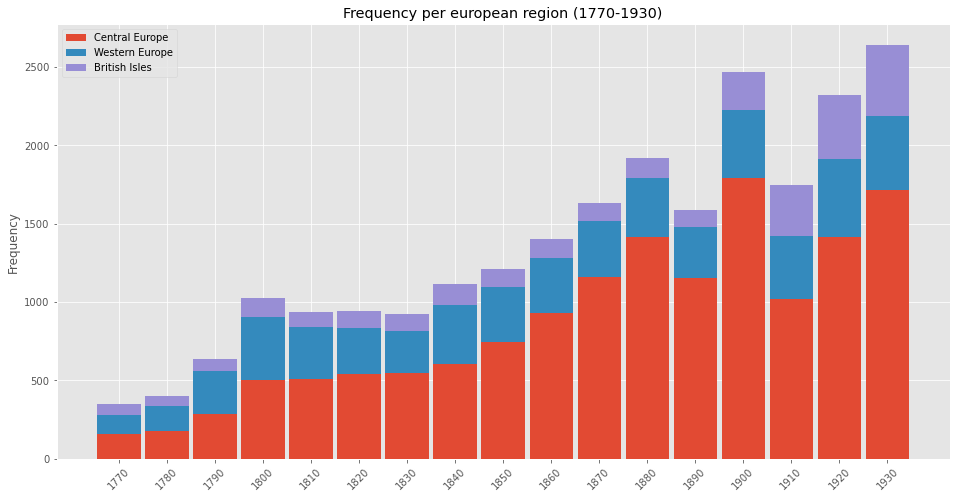

In [44]:
display(k)

#### Comments: 
* The dates used to realize these visualizations are dates of birth. They are dependent on the demographic variations. We choose to slice in 1930 to evaluate the curve before and after the First World War. 
* First, we observe, for **Scandinavia**, between 1770 and 1930, a step after 1860 where the number of individuals increases much. Then, in the **British Isles**, in the same way, this step appends later, after 1900. In **Southern Europe**, the increase seems softer. In **Central Europe**, the curve has characteristics quite similar. But the effects of the First World War are observed (it was already the case for **Southern Europe**, in less proportion). The curve rises strongly in **Southeastern Europe** after 1840 and the number of individuals maintains, more or less, after 1875-1880. Before 1840, the number of individuals is very low compare to after. In **Eastern Europe**, the curve increases all along the XIXth century. But it decreases after 1885 until 1915 and rises again after. Between 1920 and 1930, the number of individuals has returned the same as in 1885. To finish, in **Western Europe**, the curve rises much between 1770 and 1800 and maintains after with some variations.

In [30]:
def interactive_region_periods(region, period = 10, remaining = False):
    
    output_l = []
    work_l = int_coded_euro_list # The year must be integers
    for a in region:
        prov_l = []
        for l in work_l:            
            if a == l[1]:
                output_l.append(l)
            else:
                prov_l.append(l)
        work_l = prov_l

    print('Number of regions chosen: ', len(output_l))
    print('The other (regions unchosen): ',len(work_l))
    print('\n-----')
    
    period = period
    y_list = create_years_list(period = period, y_start = 1930, y_end = 1950)
    
    with plt.style.context("ggplot"):
                
        fig, ax = plt.subplots(figsize=(16,8)) 


        width =  period - (period * 10 / 100)

        bottom_list = []
        i = 0
        while i < len(y_list):
            bottom_list.append(0)
            i += 1

            
        if remaining:
            i_list = []
            for i in y_list:
                i_n = 0
                for l in work_l:
                    if int(l[0]) >= i and int(l[0]) < (i + period):
                        i_n += 1
                i_list.append([i, i_n]) 
            draw_l = [i[1] for i in i_list]
            ax.bar(y_list, draw_l, width, bottom = bottom_list, label='remaining' )
            bottom_list = [x + y for x, y in zip(bottom_list, draw_l)]
            
            
        for a in region:
            i_list = []
            for i in y_list:
                i_n = 0
                for l in output_l:
                    if l[1] == a and int(l[0]) >= i and int(l[0]) < (i + period):
                        i_n += 1
                i_list.append([i, i_n]) 
            draw_l = [i[1] for i in i_list]
            ax.bar(y_list, draw_l, width, bottom = bottom_list, label=a )
            bottom_list = [x + y for x, y in zip(bottom_list, draw_l)]
        ax.set_ylabel('Frequency')
        ax.set_title('Frequency per European region (1930-1950)')
        
        plt.xticks(y_list,rotation=45)

        ax.legend()

        p_out = plt.show()


In [31]:
# Frequency per region between 1930 and 1950

k = interactive(interactive_region_periods, region=SelectMultiple(
    options=sorted(values_l),
    value=['Central Europe',
           #'Southern Europe',
           #'Western Europe',
           #'British Isles',
           #'Scandinavia',
           #'Eastern Europe',
           #'Southeastern Europe'
            ],
    description='Number of regions chosen: ',
    disabled=False
),  period=IntSlider(min=1, max=10, step=1, value=1),
    remaining = Checkbox(
    value=False,
    description='The other (regions unchosen):',
    disabled=False
))

Number of regions chosen:  22734
The other (regions unchosen):  35980

-----


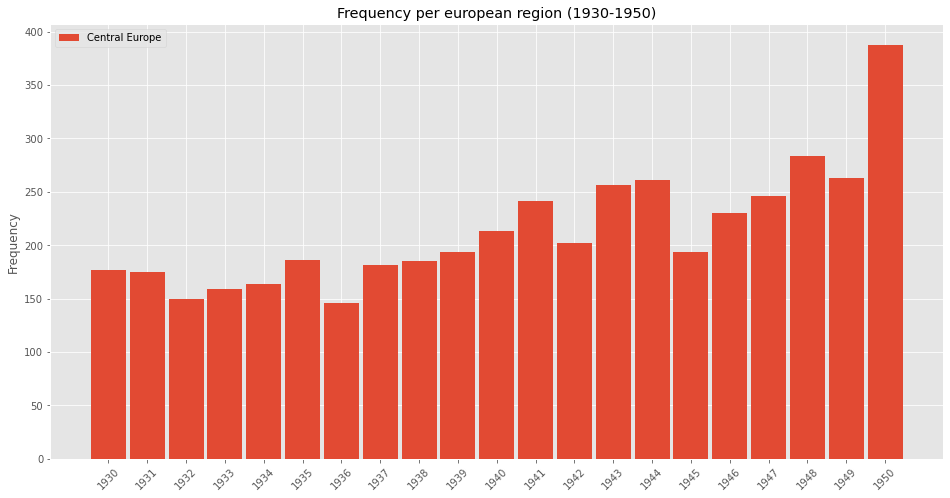

In [32]:
display(k)

## Contingency table between occupations and European regions

In [132]:
# Creation of the occupation-European regions contingency table
X = "occupation"  
Y = "region"

contEuroOcc = merged_euro[[X,Y]].pivot_table(index=Y,columns=X,aggfunc=len, margins=True, margins_name='All*').fillna(0).astype(int) 
contEuroOcc = contEuroOcc.sort_values(by="All*")
contEuroOcc= contEuroOcc.loc[:,contEuroOcc.columns!="All*"]


In [133]:
# change the number of individuals into a percentage

perc_contin_EO = contEuroOcc.apply(lambda x: x*100/sum(x), axis=1)
perc_contin_EO

occupation,economist,jurist,jurist/economist
region,,,
Southeastern Europe,30.18,67.93,1.891
Eastern Europe,51.58,47.6,0.8206
Scandinavia,21.23,78.35,0.4246
British Isles,14.79,85.05,0.1627
Western Europe,19.29,79.79,0.9174
Southern Europe,17.88,80.71,1.404
Central Europe,24.65,74.5,0.8489
All*,23.98,75.09,0.9265


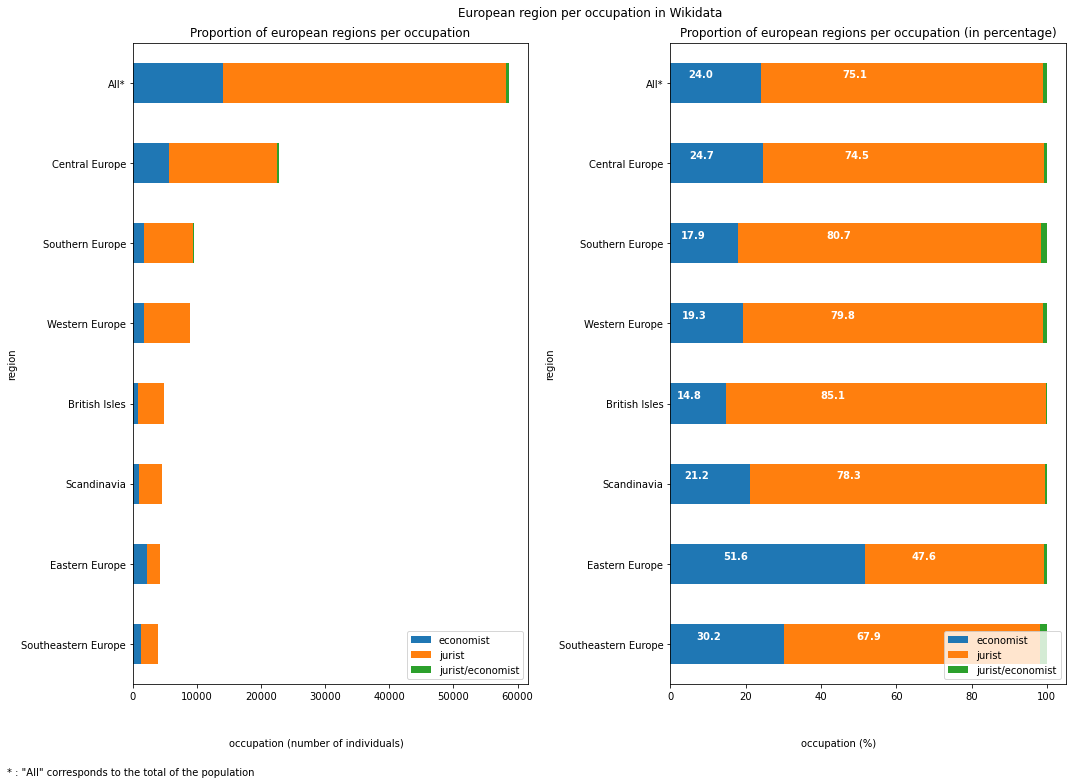

In [134]:
# create subplots side by side:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
fig.suptitle(x=0.55,y=0.98, t='European regions per occupation in Wikidata')
contEuroOcc.plot( kind='barh', stacked=True, ax=ax1,title="Proportion of European regions per occupation")
z_EO= perc_contin_EO.plot(kind="barh", stacked=True, ax=ax2, title="Proportion of European regions per occupation (in percentage)")
plt.tight_layout()

# Set labels and legends

fig.text(0.745, -0.05, 'occupation (%)', ha='left', va='bottom')
fig.text(0.215, -0.05, 'occupation (number of individuals)', ha='left', va='bottom')
fig.text(0.01, -0.09, '* : "All" corresponds to the total of the population', ha='left', va='bottom')

#  Add percentages on the right plot: 

for p in z_EO.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width >= 2:
        z_EO.annotate(format(p.get_width(), '.1f'), 
                   (p.get_x() + p.get_width()/3, p.get_y() + p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   weight='bold',
                   color = 'white',
                   xytext = (0, -12),
                   textcoords = 'offset points')

ax1.legend(loc='lower right')
ax2.legend(loc='lower right')

plt.show()

## Contingency table between genders and European regions

In [136]:
# Creation of the contingency table

X = "gender"  
Y = "region"

contEuroGend = merged_euro[[X,Y]].pivot_table(index=Y,columns=X,aggfunc=len, margins=True, margins_name='All*').fillna(0).astype(int) 
contEuroGend = contEuroGend.sort_values(by="All*")
contEuroGend= contEuroGend.loc[:,contEuroGend.columns!="All*"]

In [137]:
perc_contin_EG = contEuroGend.apply(lambda x: x*100/sum(x), axis=1)
perc_contin_EG

gender,female,male,other
region,,,
Southeastern Europe,8.945,91.06,0.0
Eastern Europe,13.43,86.57,0.0
Scandinavia,11.87,88.13,0.0
British Isles,10.19,89.77,0.04068
Western Europe,9.309,90.68,0.01119
Southern Europe,8.71,91.28,0.01056
Central Europe,7.83,92.17,0.0
All*,9.183,90.81,0.006813


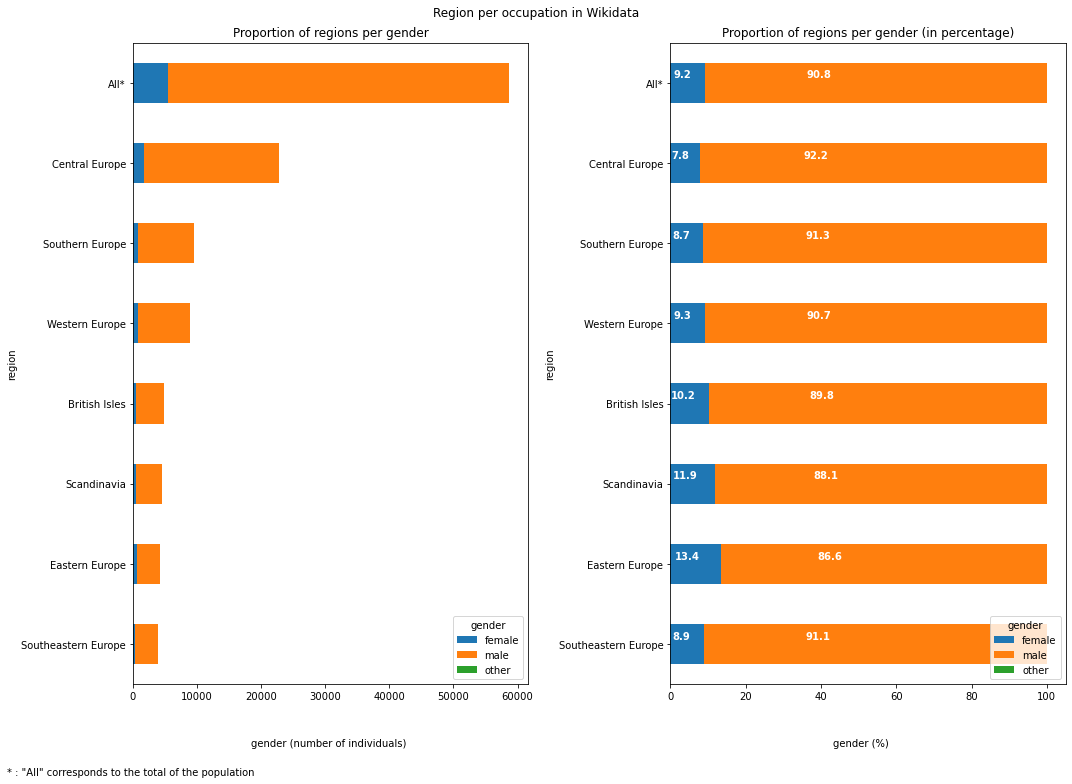

In [138]:
# create subplots side by side:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
fig.suptitle('Region per occupation in Wikidata')
contEuroGend.plot( kind='barh', stacked=True, ax=ax1, title="Proportion of regions per gender")
z_EG=perc_contin_EG.plot(kind="barh", stacked=True, ax=ax2, title="Proportion of regions per gender (in percentage)")
plt.tight_layout()

# Set labels and legends

fig.text(0.775, -0.05, 'gender (%)', ha='left', va='bottom')
fig.text(0.38, -0.05, 'gender (number of individuals)', ha='right', va='bottom')
fig.text(0.01, -0.09, '* : "All" corresponds to the total of the population', ha='left', va='bottom')

#  Add percentages on the right plot: 

for p in z_EG.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width >= 2:
        z_EG.annotate(format(p.get_width(), '.1f'), 
                   (p.get_x() + p.get_width()/3, p.get_y() + p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   weight='bold',
                   color = 'white',
                   xytext = (0, -12),
                   textcoords = 'offset points')
plt.show()

In [95]:
d20List = []
period = 20
d_start = 1771
i = 0
d20List.append(d_start)

while i < 11:
    d_start = d_start + period
    d20List.append(d_start)
    i += 1

In [96]:
merged_euro_generation = merged_euro.copy(deep=True)
merged_euro_generation= merged_euro_generation[merged_euro_generation["year"]<=1950]
merged_euro_generation['generation'] = pd.cut(merged_euro['year'], d20List, right=False)

In [97]:
merged_euro_generation['generation'] = merged_euro_generation['generation'].apply(lambda row : str(int(row.left))+'-'+str(int(row.right)))

In [98]:
pt_generation_euro = pd.pivot_table(merged_euro_generation, index=['generation'], values='year', aggfunc=len,fill_value=0)
print(type(pt_generation_euro))
pt_generation_euro

<class 'pandas.core.frame.DataFrame'>


,year
generation,
1771-1791,1068
1791-1811,2253
1811-1831,2784
1831-1851,3327
1851-1871,4371
1871-1891,5958
1891-1911,6501
1911-1931,6728
1931-1951,10916


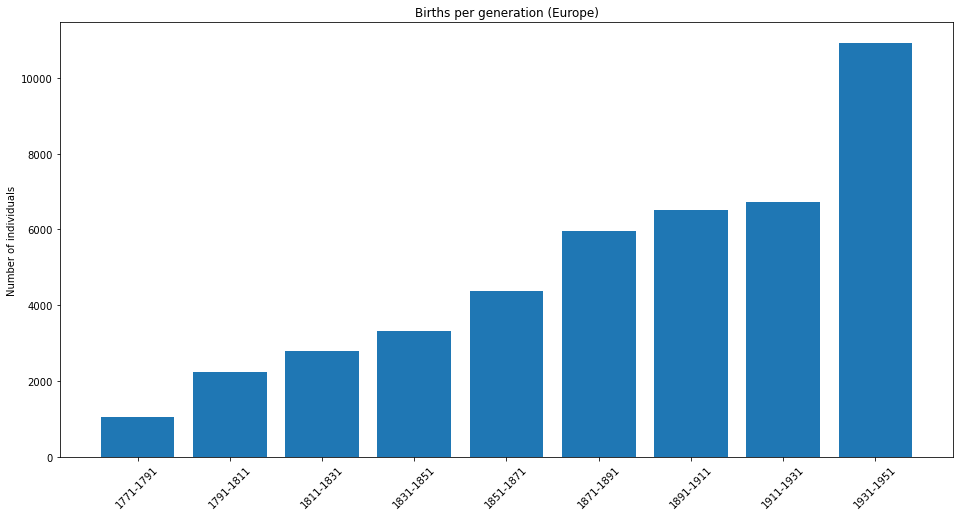

In [100]:
objects = [l for l in pt_generation_euro.index]
eff = [l for l in pt_generation_euro['year']]

p1 = plt.bar(objects, eff)

plt.ylabel('Number of individuals')
plt.title('Births per generation (Europe)')
plt.gcf().set_size_inches(16, 8)

# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
# plt.savefig('exported_pictures/effectifs_annees_reference_par_periode.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()

In [22]:
### Generation-European region contingency table
X = "generation"  
Y = "region"

generation_europe = merged_euro_generation[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len).fillna(0).astype(int) 
generation_europe



region,British Isles,Central Europe,Eastern Europe,Scandinavia,Southeastern Europe,Southern Europe,Western Europe
generation,,,,,,,
1771-1791,138,355,25,117,12,137,284
1791-1811,194,794,50,144,28,352,691
1811-1831,204,1057,98,200,52,548,625
1831-1851,264,1166,208,213,135,700,641
1851-1871,227,1719,276,369,297,772,711
1871-1891,241,2583,404,442,561,993,734
1891-1911,363,2965,278,507,534,1088,766
1911-1931,744,2468,374,614,576,1035,917
1931-1951,1329,4318,818,776,648,1629,1398


In [30]:
# change the number of individuals into a percentage

perc_contin_euro = generation_europe.apply(lambda x: x*100/sum(x), axis=1)

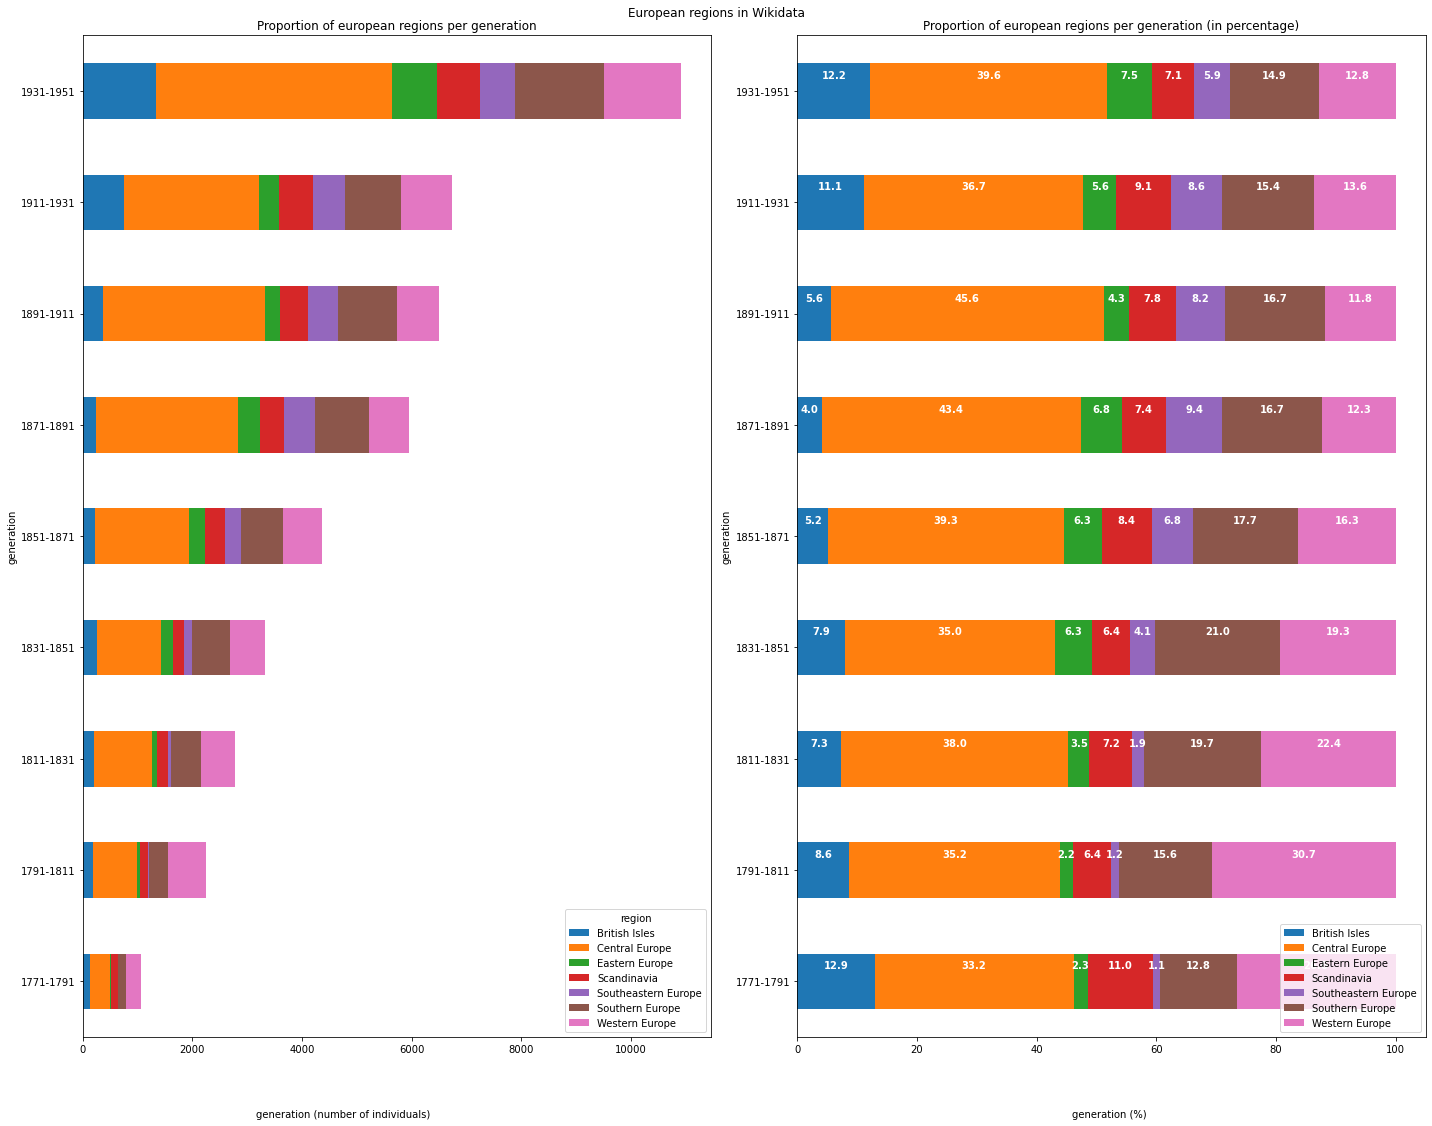

In [31]:
# create subplots side by side:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 15))
fig.suptitle('European regions in Wikidata')
g=generation_europe.plot( kind='barh', stacked=True, ax=ax1, title="Proportion of European regions per generation")
z= perc_contin_euro.plot(kind="barh", stacked=True, ax=ax2, title="Proportion of European regions per generation (in percentage)")
plt.tight_layout()

# Set labels and legends

fig.text(0.747, -0.05, 'generation (%)', ha='left', va='bottom')
fig.text(0.180, -0.05, 'generation (number of individuals)', ha='left', va='bottom')

plt.legend(loc='best')

#  Add percentages on the right plot: 

for p in z.patches:
    left, bottom, width, height = p.get_bbox().bounds
    #if width >= 2:
        z.annotate(format(p.get_width(), '.1f'), 
                   (p.get_x() + p.get_width()/2, p.get_y() + p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   # style = 'italic',
                   weight='bold',
                   color = 'white',
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.show()

In [152]:
### Tableau de contingence décennies-nationalités : effectifs

X = "generation"  
Y = "region"

generation_europe_margins = merged_euro_generation[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len, margins=True).fillna(0).astype(int) 
generation_europe_margins= generation_europe_margins.loc[:,generation_europe_margins.columns!="uncoded"]
generation_europe_margins

region,British Isles,Central Europe,Eastern Europe,Scandinavia,Southeastern Europe,Southern Europe,Western Europe,All
generation,,,,,,,,
1771-1791,138,355,25,117,12,137,284,1068
1791-1811,194,794,50,144,28,352,691,2253
1811-1831,204,1057,98,200,52,548,625,2784
1831-1851,264,1166,208,213,135,700,641,3327
1851-1871,227,1719,276,369,297,772,711,4371
1871-1891,241,2583,404,442,561,993,734,5958
1891-1911,363,2965,278,507,534,1088,766,6501
1911-1931,744,2468,374,614,576,1035,917,6728
1931-1951,1329,4318,818,776,648,1629,1398,10916


In [153]:
pd.options.display.float_format = '{0:3.4}'.format
generation_europe_margins.apply(lambda x: x*100/sum(x[-1:]), axis=1)

region,British Isles,Central Europe,Eastern Europe,Scandinavia,Southeastern Europe,Southern Europe,Western Europe,All
generation,,,,,,,,
1771-1791,12.92,33.24,2.341,10.96,1.124,12.83,26.59,100.0
1791-1811,8.611,35.24,2.219,6.391,1.243,15.62,30.67,100.0
1811-1831,7.328,37.97,3.52,7.184,1.868,19.68,22.45,100.0
1831-1851,7.935,35.05,6.252,6.402,4.058,21.04,19.27,100.0
1851-1871,5.193,39.33,6.314,8.442,6.795,17.66,16.27,100.0
1871-1891,4.045,43.35,6.781,7.419,9.416,16.67,12.32,100.0
1891-1911,5.584,45.61,4.276,7.799,8.214,16.74,11.78,100.0
1911-1931,11.06,36.68,5.559,9.126,8.561,15.38,13.63,100.0
1931-1951,12.17,39.56,7.494,7.109,5.936,14.92,12.81,100.0


In [154]:
generation_europe_margins.iat[-1,-1]

43906

In [155]:
tx = generation_europe_margins.loc[:,["All"]]
ty = generation_europe_margins.loc[["All"],:]
n = generation_europe_margins.iat[-1,-1] 

### Compute the matrix multiplication between the columns.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dot.html
indep = tx.dot(ty) / n
#pd.options.display.float_format = '{0:3.5}'.format

# Arrondi
print(indep.astype(int))



region      British Isles  Central Europe  Eastern Europe  Scandinavia  \
generation                                                               
1771-1791              90             423              61           82   
1791-1811             190             894             129          173   
1811-1831             234            1104             160          214   
1831-1851             280            1320             191          256   
1851-1871             368            1734             251          336   
1871-1891             502            2364             343          458   
1891-1911             548            2580             374          500   
1911-1931             567            2670             387          518   
1931-1951             920            4332             629          840   
All                  3704           17425            2531         3382   

region      Southeastern Europe  Southern Europe  Western Europe    All  
generation                           

In [156]:
### Différence en effectifs entre le théorique et l'observé
### Doc. :
#  https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2
deviations = (generation_europe_margins-indep)
## Attention : arrondi aux entiers dans l'affichage
print(deviations.astype(int))

region      British Isles  Central Europe  Eastern Europe  Scandinavia  \
generation                                                               
1771-1791              47             -68             -36           34   
1791-1811               3            -100             -79          -29   
1811-1831             -30             -47             -62          -14   
1831-1851             -16            -154              16          -43   
1851-1871            -141             -15              24           32   
1871-1891            -261             218              60          -16   
1891-1911            -185             384             -96            6   
1911-1931             176            -202             -13           95   
1931-1951             408             -14             188          -64   
All                     0               0               0            0   

region      Southeastern Europe  Southern Europe  Western Europe  All  
generation                             

In [157]:
weighted_deviations = (generation_europe_margins-indep)**2/indep
weighted_deviations

region,British Isles,Central Europe,Eastern Europe,Scandinavia,Southeastern Europe,Southern Europe,Western Europe,All
generation,,,,,,,,
1771-1791,25.47,11.19,21.72,14.67,47.24,8.821,86.6,0.0
1791-1811,0.08136,11.22,49.13,5.03,95.26,1.1,340.3,0.0
1811-1831,4.056,2.076,24.33,0.9732,91.27,16.85,89.45,0.0
1831-1851,0.9904,18.05,1.37,7.307,30.03,41.11,32.07,0.0
1851-1871,54.49,0.1425,2.292,3.101,0.6895,3.439,2.068,0.0
1871-1891,136.2,20.18,10.67,0.6248,79.57,0.07583,36.98,0.0
1891-1911,62.7,57.43,24.98,0.07775,30.36,0.1806,55.57,0.0
1911-1931,54.83,15.3,0.494,17.69,45.21,5.275,13.88,0.0
1931-1951,180.9,0.0468,56.61,5.0,4.897,16.88,48.08,0.0


In [158]:
import seaborn as sns

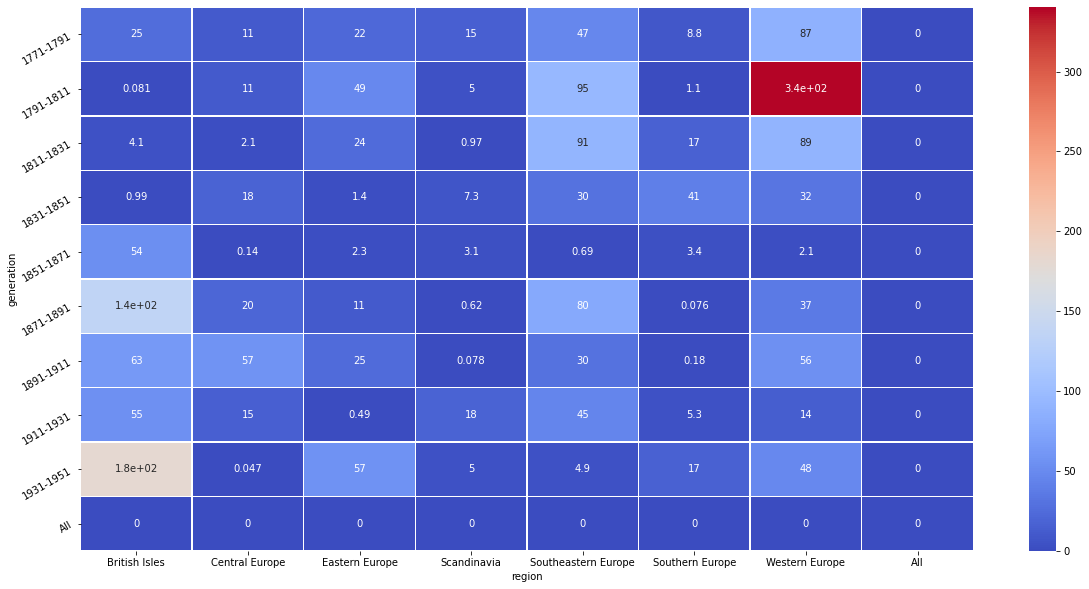

In [159]:
#xi_n = measure.sum().sum()
#table = measure/xi_n
fig, ax = plt.subplots(figsize=(20,10))         
# Sample figsize in inches
g = sns.heatmap(weighted_deviations, annot=weighted_deviations, cmap="coolwarm", linewidths=.5, ax=ax)
labels = weighted_deviations.index
p = g.set_yticklabels(labels, rotation=30)



In [23]:
# Count totals in column

tot_line = np.sum(generation_europe.values,axis=1)
print(tot_line)

# Count totals in column

tot_col =np.sum(generation_europe.values,axis=0)
print(tot_col)

[ 1068  2253  2784  3327  4371  5958  6501  6728 10916]
[ 3704 17425  2531  3382  2843  7254  6767]


In [24]:
prof_line = np.apply_along_axis(arr=generation_europe.values,axis=1,func1d=lambda x:x/np.sum(x))
print(prof_line)

[[0.12921348 0.332397   0.02340824 0.10955056 0.01123596 0.12827715
  0.2659176 ]
 [0.08610741 0.352419   0.02219263 0.06391478 0.01242787 0.15623613
  0.30670217]
 [0.07327586 0.37966954 0.03520115 0.07183908 0.01867816 0.19683908
  0.22449713]
 [0.07935077 0.35046589 0.06251879 0.06402164 0.0405771  0.21039976
  0.19266607]
 [0.0519332  0.39327385 0.06314345 0.08442004 0.06794784 0.17661862
  0.16266301]
 [0.04044982 0.43353474 0.06780799 0.07418597 0.09415911 0.16666667
  0.1231957 ]
 [0.05583756 0.45608368 0.04276265 0.077988   0.08214121 0.16735887
  0.11782803]
 [0.11058264 0.36682521 0.05558859 0.0912604  0.08561237 0.15383472
  0.13629608]
 [0.12174789 0.39556614 0.07493587 0.07108831 0.0593624  0.14923049
  0.12806889]]


In [25]:
prof_marg_line= tot_col/np.sum(tot_col)
print(prof_marg_line)

[0.08436205 0.39687059 0.05764588 0.0770282  0.06475197 0.1652166
 0.15412472]


In [26]:
#chi-squared distance between "1811-1831"(2) et "1851-1871"(4)
print(np.sum((prof_line[2,:]-prof_line[4,:])**2/prof_marg_line))

0.08623643646347462


In [27]:
distPairsLine = np.zeros(shape=(prof_line.shape[0],prof_line.shape[0]))

for i in range(prof_line.shape[0]-1):
    for j in range(i+1,prof_line.shape[0]):
        distPairsLine[i,j] = np.sum((prof_line[i,:]-prof_line[j,:])**2/prof_marg_line)
#distPairesLig[j,i] = distPairesLig[i,j]
#affichage
print(pd.DataFrame(distPairsLine,index=generation_europe.index,columns=generation_europe.index))

generation  1771-1791  1791-1811  1811-1831  1831-1851  1851-1871  1871-1891  \
generation                                                                     
1771-1791         0.0   0.065644   0.104035   0.172670   0.248708   0.416879   
1791-1811         0.0   0.000000   0.062001   0.143130   0.237331   0.401065   
1811-1831         0.0   0.000000   0.000000   0.031418   0.086236   0.198679   
1831-1851         0.0   0.000000   0.000000   0.000000   0.043254   0.124380   
1851-1871         0.0   0.000000   0.000000   0.000000   0.000000   0.028701   
1871-1891         0.0   0.000000   0.000000   0.000000   0.000000   0.000000   
1891-1911         0.0   0.000000   0.000000   0.000000   0.000000   0.000000   
1911-1931         0.0   0.000000   0.000000   0.000000   0.000000   0.000000   
1931-1951         0.0   0.000000   0.000000   0.000000   0.000000   0.000000   

generation  1891-1911  1911-1931  1931-1951  
generation                                   
1771-1791    0.350978   0.2

<AxesSubplot:>

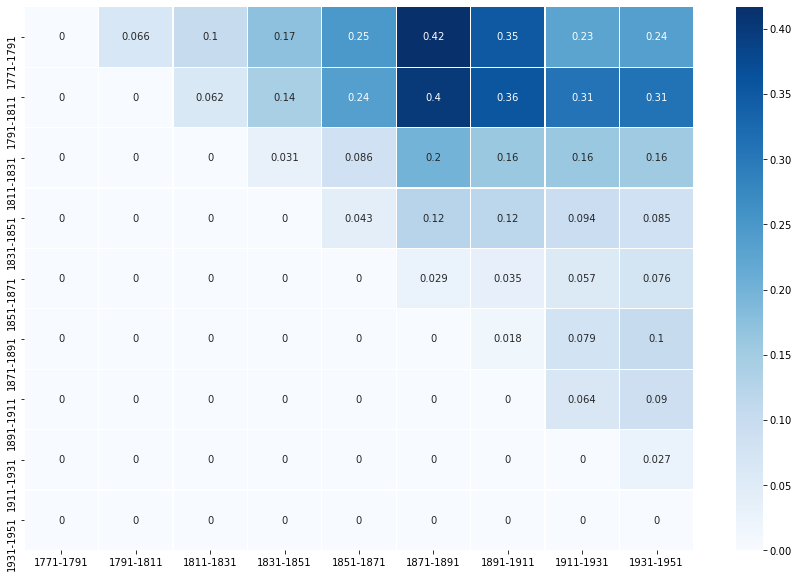

In [28]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(distPairsLine,vmin=0,vmax=np.max(distPairsLine),linewidth=0.1,cmap=
'Blues',xticklabels=generation_europe.index,annot=True, yticklabels=generation_europe.index)

In [29]:
distoLines = np.apply_along_axis(arr=prof_line,axis=1,func1d=lambda x:np.sum((x
-prof_marg_line)**2/prof_marg_line))

In [30]:
print(pd.DataFrame(distoLines,index=generation_europe.index))

                   0
generation          
1771-1791   0.201962
1791-1811   0.222867
1811-1831   0.082259
1831-1851   0.039352
1851-1871   0.015150
1871-1891   0.047715
1891-1911   0.035579
1911-1931   0.022694
1931-1951   0.028616


In [31]:
weightLines = tot_line/np.sum(tot_line)

In [32]:
inertiaLines = distoLines * weightLines

In [33]:
print(pd.DataFrame(np.transpose([distoLines,weightLines,inertiaLines])
                       ,columns=['Disto2','Weight','Inertia'],index=generation_europe.index))

              Disto2    Weight   Inertia
generation                              
1771-1791   0.201962  0.024325  0.004913
1791-1811   0.222867  0.051314  0.011436
1811-1831   0.082259  0.063408  0.005216
1831-1851   0.039352  0.075776  0.002982
1851-1871   0.015150  0.099554  0.001508
1871-1891   0.047715  0.135699  0.006475
1891-1911   0.035579  0.148066  0.005268
1911-1931   0.022694  0.153236  0.003478
1931-1951   0.028616  0.248622  0.007115


In [34]:
tot_inertiaLines = np.sum(inertiaLines)
print(tot_inertiaLines)

0.04839016256964861


In [36]:
from fanalysis.ca import CA
#lancer les calculs
afc = CA(row_labels=generation_europe.index,col_labels=generation_europe.columns)
afc.fit(generation_europe.values)
#information restituée sur les facteurs
print(afc.eig_)

[[2.76184944e-02 1.39678574e-02 3.43409027e-03 1.88329453e-03
  1.02955854e-03 4.56867411e-04]
 [5.70746055e+01 2.88650764e+01 7.09667024e+00 3.89189544e+00
  2.12761952e+00 9.44132829e-01]
 [5.70746055e+01 8.59396820e+01 9.30363522e+01 9.69282477e+01
  9.90558672e+01 1.00000000e+02]]


In [37]:
print(pd.DataFrame(afc.row_coord_,index=generation_europe.index))

                   0         1         2         3         4         5
generation                                                            
1771-1791  -0.402761  0.100493 -0.152623  0.000772 -0.015821 -0.078118
1791-1811  -0.454701 -0.084540 -0.048982 -0.016883 -0.065036  0.045309
1811-1831  -0.260163 -0.097304  0.034511 -0.035699  0.049190 -0.014858
1831-1851  -0.142715 -0.038323  0.113058  0.047581  0.046589  0.017292
1851-1871   0.012776 -0.103325  0.021843  0.048407 -0.014284 -0.035859
1871-1891   0.170961 -0.127322  0.014835  0.020637 -0.040151  0.004301
1891-1911   0.130360 -0.107280 -0.048337 -0.063189  0.027003  0.004284
1911-1931   0.053900  0.100114 -0.075514  0.057387  0.023764  0.014347
1931-1951   0.033818  0.157166  0.040268 -0.030373 -0.014867 -0.002573


In [38]:
print(np.sum(weightLines * afc.row_coord_[:,0]))

-3.469446951953614e-18


In [39]:
print(np.sum(weightLines * afc.row_coord_[:,0]**2))

0.02761849441106568


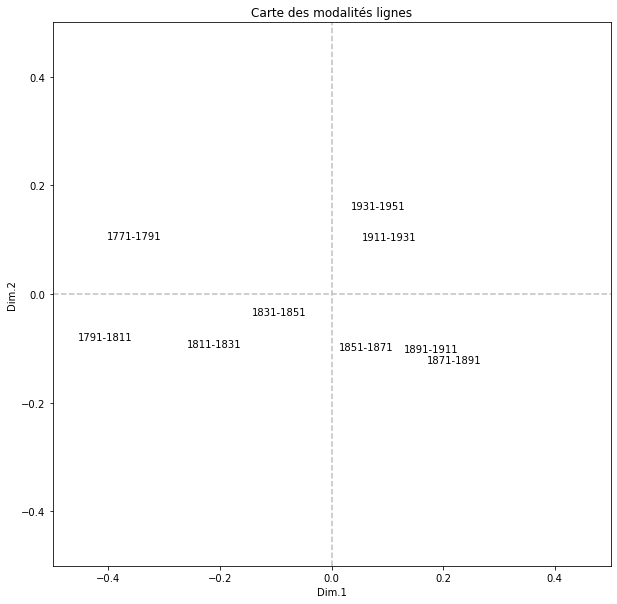

In [41]:
fig, ax = plt.subplots(figsize=(10,10))
ax.axis([-0.5,+0.5,-0.5,+0.5])
ax.plot([-0.5,+0.5],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-0.5,+0.5],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Carte des modalités lignes")
for i in range(generation_europe.shape[0]):
    ax.text(afc.row_coord_[i,0],afc.row_coord_[i,1],generation_europe.index[i])
plt.show()

In [43]:
prof_marg_col = tot_line/np.sum(tot_line)
print(prof_marg_col)

[0.02432469 0.05131417 0.06340819 0.07577552 0.09955359 0.13569899
 0.14806632 0.15323646 0.24862206]


In [44]:
prof_col = np.apply_along_axis(arr=generation_europe.values,axis=0,func1d=lambda x:x/np.sum(x))
print(pd.DataFrame(prof_col,index=generation_europe.index,columns=generation_europe.columns))

region      British Isles  Central Europe  Eastern Europe  Scandinavia  \
generation                                                               
1771-1791        0.037257        0.020373        0.009878     0.034595   
1791-1811        0.052376        0.045567        0.019755     0.042578   
1811-1831        0.055076        0.060660        0.038720     0.059137   
1831-1851        0.071274        0.066915        0.082181     0.062980   
1851-1871        0.061285        0.098651        0.109048     0.109107   
1871-1891        0.065065        0.148235        0.159621     0.130692   
1891-1911        0.098002        0.170158        0.109838     0.149911   
1911-1931        0.200864        0.141636        0.147768     0.181549   
1931-1951        0.358801        0.247805        0.323192     0.229450   

region      Southeastern Europe  Southern Europe  Western Europe  
generation                                                        
1771-1791              0.004221         0.018886   

In [45]:
distoCol = np.apply_along_axis(arr=prof_col,axis=0,func1d=lambda x:np.sum((x
-prof_marg_col)**2/prof_marg_col))

In [46]:
print(pd.DataFrame(distoCol,index=generation_europe.columns))

                            0
region                       
British Isles        0.140295
Central Europe       0.007784
Eastern Europe       0.075698
Scandinavia          0.016106
Southeastern Europe  0.149323
Southern Europe      0.012922
Western Europe       0.104183


In [49]:
weightCol = tot_col/np.sum(tot_col)
print(pd.DataFrame(weightCol,index=generation_europe.columns))

                            0
region                       
British Isles        0.084362
Central Europe       0.396871
Eastern Europe       0.057646
Scandinavia          0.077028
Southeastern Europe  0.064752
Southern Europe      0.165217
Western Europe       0.154125


In [50]:
inertiaCol = distoCol*weightCol
print(pd.DataFrame(inertiaCol,index=generation_europe.columns))

                            0
region                       
British Isles        0.011836
Central Europe       0.003089
Eastern Europe       0.004364
Scandinavia          0.001241
Southeastern Europe  0.009669
Southern Europe      0.002135
Western Europe       0.016057


In [51]:
print(np.sum(inertiaCol))

0.04839016256964861


In [52]:
print(pd.DataFrame(afc.col_coord_,index=generation_europe.columns))

                            0         1         2         3         4  \
region                                                                  
British Isles       -0.094345  0.360416 -0.024672 -0.015775  0.019674   
Central Europe       0.063440 -0.037797 -0.004614 -0.047268 -0.008387   
Eastern Europe       0.163262  0.123701  0.161240  0.057559 -0.062392   
Scandinavia          0.018999  0.016503 -0.095534  0.049514  0.020933   
Southeastern Europe  0.363866 -0.033597 -0.087332  0.078524 -0.015977   
Southern Europe     -0.021043 -0.069306  0.061975  0.022038  0.057425   
Western Europe      -0.312589 -0.066058 -0.016921  0.027463 -0.031143   

                            5  
region                         
British Isles        0.015796  
Central Europe      -0.002222  
Eastern Europe      -0.023178  
Scandinavia         -0.058788  
Southeastern Europe  0.041809  
Southern Europe      0.007200  
Western Europe       0.009842  


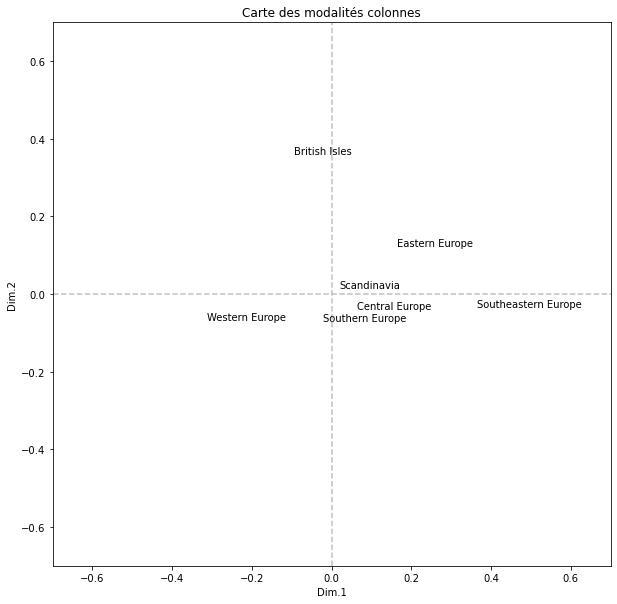

In [54]:
#affichage dans le premier plan factoriel
fig, ax = plt.subplots(figsize=(10,10))
ax.axis([-0.7,+0.7,-0.7,+0.7])
ax.plot([-0.7,+0.7],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-0.7,+0.7],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Carte des modalités colonnes")
for i in range(generation_europe.shape[1]):
    ax.text(afc.col_coord_[i,0],afc.col_coord_[i,1],generation_europe.columns[i])
plt.show()

In [55]:
n = np.sum(generation_europe.values)

In [56]:
E = np.dot(np.reshape(tot_line,(9,1)),np.reshape(tot_col,(1,7)))/n
print(E)

[[  90.09866533  423.85778709   61.56579966   82.26611397   69.15510409
   176.45132784  164.60520202]
 [ 190.06769007  894.14943288  129.87616727  173.54452694  145.88618868
   372.23299777  347.2429964 ]
 [ 234.86393659 1104.88771466  160.48612946  214.44649934  180.26948481
   459.96301189  429.08322325]
 [ 280.67252767 1320.38844349  191.78784221  256.27281009  215.42980458
   549.6756252   512.77294675]
 [ 368.74650389 1734.72133649  251.97014076  336.69024735  283.03086139
   722.16175466  673.67915547]
 [ 502.6290712  2364.55495832  343.45415205  458.93399535  385.79223796
   984.36049743  918.27508769]
 [ 548.43766228 2580.05568715  374.7558648   500.76030611  420.95255774
  1074.07311074 1001.96481119]
 [ 567.58784676 2670.14531044  387.84147952  518.24570674  435.65125495
  1111.57727873 1036.95112285]
 [ 920.89609621 4332.23932948  629.26242427  840.83979411  706.83250581
  1803.50439575 1682.42545438]]


In [57]:
KHI2 = np.sum(((generation_europe.values-E)**2)/E)
print(KHI2)

2124.6184777829926


In [58]:
ddl = (E.shape[0]-1)*(E.shape[1]-1)
print(ddl)

48


In [59]:
import scipy

In [60]:
print(1-scipy.stats.chi2.cdf(KHI2,ddl))

0.0


In [61]:
IAR = generation_europe.values/E

In [63]:
G = 2*np.sum(generation_europe.values*np.log(IAR))
print(G)

2163.5914306967798


In [64]:
print(ddl)

48


In [65]:
print(1-scipy.stats.chi2.cdf(G,ddl))

0.0


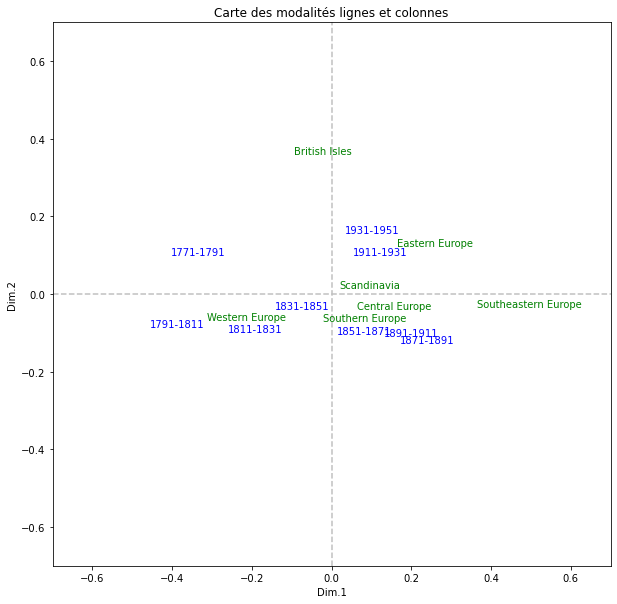

In [66]:
fig, ax = plt.subplots(figsize=(10,10))
ax.axis([-0.7,+0.7,-0.7,+0.7])
ax.plot([-0.7,+0.7],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-0.7,+0.7],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Carte des modalités lignes et colonnes")
#modalités ligne
for i in range(generation_europe.shape[0]):
    ax.text(afc.row_coord_[i,0],afc.row_coord_[i,1],generation_europe.index[i],color='blue')
#modalités colonne
for i in range(generation_europe.shape[1]):
    ax.text(afc.col_coord_[i,0],afc.col_coord_[i,1],generation_europe.columns[i],color='green')
plt.show()

In [1]:
ACM_euro= merged_euro_generation.loc[:,merged_euro_generation.columns!="year"]
ACM_euro.to_csv("spreadsheets/ACM_europe.csv", sep="|" ,index=False)
ACM_euro["generation"]=ACM_euro["generation"].astype('object')
ACM_euro

NameError: name 'merged_euro_generation' is not defined

In [98]:
print(ACM_euro.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43945 entries, 0 to 64605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   uri_entity  43945 non-null  object
 1   occupation  43945 non-null  object
 2   region      43945 non-null  object
 3   gender      43945 non-null  object
 4   generation  43906 non-null  object
dtypes: object(5)
memory usage: 2.0+ MB
None


In [117]:
Actives_euro = ACM_euro[['region','gender','generation']]

In [118]:
#récupération des infos - nombre de variables
p = Actives_euro.shape[1]

In [119]:
n = Actives_euro.shape[0]

In [120]:
X = pd.get_dummies(Actives_euro,prefix='',prefix_sep='')
print(X)

       British Isles  Central Europe  Eastern Europe  Scandinavia  \
0                  0               1               0            0   
1                  0               1               0            0   
3                  0               1               0            0   
4                  0               1               0            0   
6                  0               1               0            0   
...              ...             ...             ...          ...   
64585              0               0               0            0   
64591              0               1               0            0   
64600              0               1               0            0   
64604              0               0               0            0   
64605              0               0               0            0   

       Southeastern Europe  Southern Europe  Western Europe  female  male  \
0                        0                0               0       1     0   
1                

In [103]:

ind_mean = np.sum(X.values,axis=0)/(n*p)
print(ind_mean)

[2.81488224e-02 1.32241059e-01 1.92134107e-02 2.56760344e-02
 2.15648348e-02 5.50309098e-02 5.14582622e-02 1.36230895e-02
 3.19687488e-01 2.27557174e-05 8.10103539e-03 1.70895437e-02
 2.11173057e-02 2.52360906e-02 3.31550802e-02 4.51928547e-02
 4.93116395e-02 5.10334888e-02 8.28004703e-02]


In [104]:
np.seterr(divide='ignore', invalid='ignore')
print(np.sum(1/ind_mean*(X.values[2,:]/p-X.values[4,:]/p)**2))

20.217369350229653


In [105]:
print(np.sum(1/ind_mean*(X.values[1,:]/p-ind_mean)**2))

1.5293962717775251


In [106]:
disto_ind = np.apply_along_axis(arr=X.values,axis=1,func1d=lambda x:np.sum(1
/ind_mean*(x/p-ind_mean)**2))

In [107]:
weights_ind = np.ones(X.shape[0])/n

In [108]:
inertia_ind = weights_ind*disto_ind

In [109]:
print(pd.DataFrame(np.transpose([disto_ind,weights_ind,inertia_ind]),index=ACM_euro.index))

               0         1         2
0      10.173228  0.000023  0.000231
1       1.529396  0.000023  0.000035
3      13.903150  0.000023  0.000316
4       2.646081  0.000023  0.000060
6       6.689184  0.000023  0.000152
...          ...       ...       ...
64585   6.627947  0.000023  0.000151
64591  13.903150  0.000023  0.000316
64600   2.440725  0.000023  0.000056
64604   7.868035  0.000023  0.000179
64605   3.824932  0.000023  0.000087

[43945 rows x 3 columns]


In [110]:
inertia_tot_ind = np.sum(inertia_ind)
print(inertia_tot_ind)

5.333629157659194


In [3]:
from fanalysis.mca import MCA

In [4]:
D=pd.read_csv("spreadsheets/ACM_europe.csv", header=0, index_col=0, sep="|")
D

,occupation,region,gender,generation
uri_entity,,,,
urn:uuid:92ebbd17-f4d1-4cdd-816c-5fcf4ba34dce,jurist,Central Europe,female,1911-1931
urn:uuid:8b81cd5a-63af-4905-817e-9dcea33ae252,jurist,Central Europe,male,1931-1951
urn:uuid:f526bf21-41c1-4a78-b1fc-3fea7e317611,jurist,Central Europe,male,1771-1791
urn:uuid:54f66a96-ec77-4151-8230-92024eae9807,jurist,Central Europe,male,1871-1891
urn:uuid:73b90396-2ee8-4fa3-9b5a-3001486a52a5,jurist,Central Europe,male,1791-1811
...,...,...,...,...
urn:uuid:24dae329-fac2-4347-ace8-f4bc43455621,jurist,Southern Europe,male,1811-1831
urn:uuid:871c2d76-9ce2-46fb-8fa1-bee150a751e0,jurist,Central Europe,male,1771-1791
urn:uuid:4a3a7b3e-7b96-4378-a9fa-0f60c5d2ab55,jurist,Central Europe,male,1891-1911


In [5]:
D["generation"]=D["generation"].astype('object')
D=D.dropna()
print(D.info())

<class 'pandas.core.frame.DataFrame'>
Index: 43906 entries, urn:uuid:92ebbd17-f4d1-4cdd-816c-5fcf4ba34dce to urn:uuid:3d9b3f55-c556-4ee4-a676-2a910f4b188b
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   occupation  43906 non-null  object
 1   region      43906 non-null  object
 2   gender      43906 non-null  object
 3   generation  43906 non-null  object
dtypes: object(4)
memory usage: 1.7+ MB
None


In [6]:
print(D)

                                              occupation           region  \
uri_entity                                                                  
urn:uuid:92ebbd17-f4d1-4cdd-816c-5fcf4ba34dce     jurist   Central Europe   
urn:uuid:8b81cd5a-63af-4905-817e-9dcea33ae252     jurist   Central Europe   
urn:uuid:f526bf21-41c1-4a78-b1fc-3fea7e317611     jurist   Central Europe   
urn:uuid:54f66a96-ec77-4151-8230-92024eae9807     jurist   Central Europe   
urn:uuid:73b90396-2ee8-4fa3-9b5a-3001486a52a5     jurist   Central Europe   
...                                                  ...              ...   
urn:uuid:24dae329-fac2-4347-ace8-f4bc43455621     jurist  Southern Europe   
urn:uuid:871c2d76-9ce2-46fb-8fa1-bee150a751e0     jurist   Central Europe   
urn:uuid:4a3a7b3e-7b96-4378-a9fa-0f60c5d2ab55     jurist   Central Europe   
urn:uuid:4c41c9b3-cefc-4ea9-ad71-8b2c9d5a1db6     jurist  Southern Europe   
urn:uuid:3d9b3f55-c556-4ee4-a676-2a910f4b188b     jurist  Southern Europe   

In [7]:
X = D.iloc[:, 0:4].to_numpy()
print(X)

[['jurist' 'Central Europe' 'female' '1911-1931']
 ['jurist' 'Central Europe' 'male' '1931-1951']
 ['jurist' 'Central Europe' 'male' '1771-1791']
 ...
 ['jurist' 'Central Europe' 'male' '1891-1911']
 ['jurist' 'Southern Europe' 'male' '1791-1811']
 ['jurist' 'Southern Europe' 'male' '1871-1891']]


In [8]:
my_mca = MCA(row_labels=D.index.values, var_labels=D.columns.values[0:4])
my_mca.fit(X)

MCA(row_labels=array(['urn:uuid:92ebbd17-f4d1-4cdd-816c-5fcf4ba34dce',
       'urn:uuid:8b81cd5a-63af-4905-817e-9dcea33ae252',
       'urn:uuid:f526bf21-41c1-4a78-b1fc-3fea7e317611', ...,
       'urn:uuid:4a3a7b3e-7b96-4378-a9fa-0f60c5d2ab55',
       'urn:uuid:4c41c9b3-cefc-4ea9-ad71-8b2c9d5a1db6',
       'urn:uuid:3d9b3f55-c556-4ee4-a676-2a910f4b188b'], dtype=object),
    var_labels=array(['occupation', 'region', 'gender', 'generation'], dtype=object))

In [9]:
print(my_mca.eig_)

[[  0.36252107   0.29230523   0.26986587   0.26354417   0.26171184
    0.25822168   0.25269952   0.25125477   0.25023218   0.24956891
    0.24823923   0.24578324   0.24028493   0.23789769   0.23143489
    0.22157868   0.20451197   0.15834414]
 [  8.05602388   6.49567184   5.99701939   5.8565372    5.81581863
    5.73825963   5.61554484   5.5834393    5.56071512   5.54597573
    5.51642724   5.46184983   5.33966502   5.28661523   5.14299748
    4.92397059   4.54471043   3.51875861]
 [  8.05602388  14.55169572  20.54871511  26.40525231  32.22107094
   37.95933057  43.57487541  49.15831471  54.71902983  60.26500555
   65.7814328   71.24328263  76.58294765  81.86956288  87.01256036
   91.93653095  96.48124139 100.        ]]


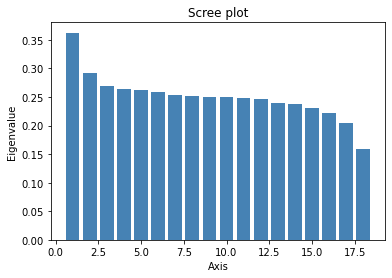

In [10]:
my_mca.plot_eigenvalues(type="absolute")

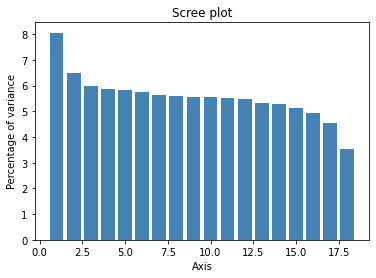

In [60]:
my_mca.plot_eigenvalues(type="percentage")

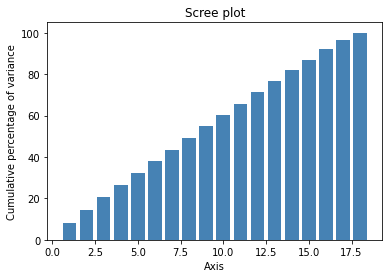

In [69]:
my_mca.plot_eigenvalues(type="cumulative")

In [61]:
df_rows = my_mca.row_topandas()

In [62]:
#print(df_rows)

In [63]:
print(my_mca.row_coord_)

[[ 0.92431215  0.37073216 -0.97814256 ...  1.25880497  0.92967439
   0.26682344]
 [ 0.27187733  0.08375022 -0.08635961 ... -0.39881294  0.00186174
  -0.66690011]
 [-0.50149644  0.64387568 -0.45515842 ... -0.18829271  0.99326104
  -0.01508501]
 ...
 [-0.23250236 -0.47288201 -0.42309575 ...  0.32539719 -0.06768515
  -0.12544594]
 [-0.79537551  0.58499944  0.46623044 ... -0.3684693   0.80773907
   0.21546136]
 [-0.52030719 -0.58066419  0.17794337 ...  0.1914997  -0.34078761
   0.18819905]]


In [64]:
print(my_mca.row_contrib_)

[[5.36760054e-03 1.07092749e-03 8.07481296e-03 ... 1.62878988e-02
  9.62540756e-03 1.02405221e-03]
 [4.64396422e-04 5.46526769e-05 6.29432987e-05 ... 1.63488286e-03
  3.86007472e-08 6.39728528e-03]
 [1.58007816e-03 3.23030542e-03 1.74845043e-03 ... 3.64430878e-04
  1.09871283e-02 3.27314768e-06]
 ...
 [3.39623405e-04 1.74238900e-03 1.51079485e-03 ... 1.08836802e-03
  5.10204357e-05 2.26353571e-04]
 [3.97454385e-03 2.66655434e-03 1.83454939e-03 ... 1.39556732e-03
  7.26606988e-03 6.67748499e-04]
 [1.70083630e-03 2.62717880e-03 2.67234034e-04 ... 3.76950527e-04
  1.29337658e-03 5.09458721e-04]]


In [65]:
print(my_mca.row_cos2_)

[[1.11110486e-01 1.78746794e-02 1.24429123e-01 ... 2.06079422e-01
  1.12403403e-01 9.25903424e-03]
 [6.09707195e-02 5.78558429e-03 6.15172145e-03 ... 1.31193948e-01
  2.85899660e-06 3.66857079e-01]
 [2.39878480e-02 3.95420914e-02 1.97597184e-02 ... 3.38160278e-03
  9.40984316e-02 2.17043632e-05]
 ...
 [2.85228300e-02 1.17989525e-01 9.44528805e-02 ... 5.58683029e-02
  2.41726708e-03 8.30330679e-03]
 [1.06109346e-01 5.74010866e-02 3.64594792e-02 ... 2.27725592e-02
  1.09433776e-01 7.78660231e-03]
 [9.23217706e-02 1.14983247e-01 1.07981184e-02 ... 1.25060646e-02
  3.96051874e-02 1.20786762e-02]]


In [66]:
df_cols = my_mca.col_topandas()

In [12]:
my_mca.mapping(2, num_y_axis=2)

KeyboardInterrupt: 

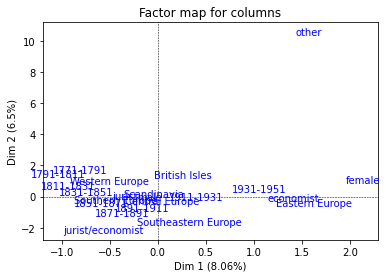

In [14]:
my_mca.mapping_col(num_x_axis=1, num_y_axis=2)

In [53]:
#my_mca.plot_row_contrib(num_axis=1)

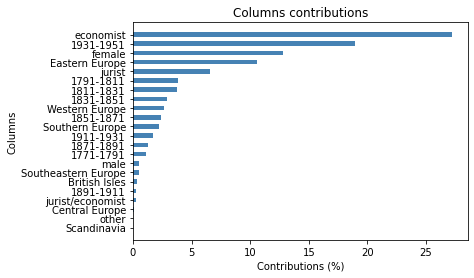

In [13]:
my_mca.plot_col_contrib(num_axis=1)

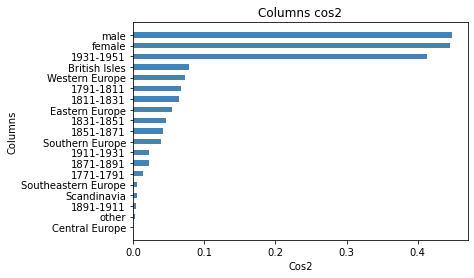

In [55]:
my_mca.plot_col_cos2(num_axis=1)